<a href="https://colab.research.google.com/github/tatianaklyueva/ml-prediction/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team 4 ML-classification project**

The project uses ML-model for prediction of penguin species.

This project was prepared for the course Data-X – applied data analytics models in real world tasks, Prague University of Economics and Business.

Collaborators:
- Petr Hollmann,
- Tatiana Kliueva,
- Sabína Rimarčíková, 
- Marek Styblík,
- Ondṙej Šesták.


The goal of the project is penguin species prediction, based on other data about penguins (bodypart sizes, sex, geography). 

Data for the project come from an article "Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis)" by K. B. Gorman, T. D. Williams and W. R. Fraser [1].

The project includes:
- Project definition, 
- Data understanding,
- Data preparation,
- Data vizualization, 
- Modeling, 
- Evaluation,
- Development of enivronment characteristics.

# Assignment

The report includes but is not limited to:
1.   Problem definition
*  What are we trying to accomplish and what is a metric of success

2.   Data Understanding 
*  Describe the dataset, report should include at minimum: 
 * Indication of missing values, type of values, unique values
 * Descriptive statistics where applicable 	
 * Correlations analysis (See Person, Spearman)
 * Duplicates (and deduplicate if applies )

3.   Data Preparation
* Prepare data to be ingested in the model of your choice. Provide a rationale for the features chosen as part of the training data. If you decide to remove columns or features explain why


4.  Data Visualization
* Provide plots of different features in the dataset. Example: 	body_mass vs flipper_lenght
* What can you conclude about the dataset after doing some data 	visualization?


5. Modeling
* Try different models and provide a rationale for your selected model choice and architecture. Describe your validation process. 	Your model report must include the following:
 * Model limitations and considerations
 * Ideas to improve the model 
 * Explain how did you choose the values for the hyper-parameters of your model

6. Evaluation
* Report the performance of your model using different metrics (Precision, recall, F1 score. Choose the appropriate one)
 	
7. Development Environment Characteristics
* Packages utilized and its respective version and python version 		


#1. Problem definition

(What are we trying to accomplish and what is a metric of success )	


Our project is an example of the Supervised Learning, a type of Machine Learning that has labels in the data. 

Our method is classification: we need to define the class to which data elements belong, we need to predict the species of penguins based on its characteristics.

There are several metrics of success [2] in classification tasks. 
*Precision* is the fraction of the correctly classified instances from the total classified instances. *Recall* is the fraction of the correctly classified instances from the total classified instances.

As a main metric of success we can use Loss-function / *F1 score*  as the harmonic mean of precision and recall. 

 	

#2. Data Understanding 	

(Describe the dataset, report should include at minimum: 		
Indication of missing values, type of values, unique values
Descriptive statistics where applicable 	
Correlations analysis (See Person, Spearman)
Duplicates (and deduplicate if applies )



Let's start with libraries and modules preparation.

In [1]:
# Dependencies
import pandas as pd # library for dataframe analysis
import matplotlib.pyplot as plt  # library for plots
import numpy as np # NumericPython library for Math operations
import pickle # to save data in binary file
import seaborn as sns # for visualisations
import tensorflow as tf #for keras (.h5 format saving)

# Usefull functions
from sklearn.model_selection import train_test_split #for split into training and testing part
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import KBinsDiscretizer #for binning variables
from sklearn.preprocessing import MinMaxScaler #for normalization
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # MSE
import sklearn.metrics as metrics # Different evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow import keras
from keras.models import save_model
from keras.models import load_model
from sklearn.metrics import confusion_matrix

# Used models
from sklearn.tree import DecisionTreeRegressor # Single tree regression
from sklearn.linear_model import LogisticRegression # Logistic regression

from sklearn.linear_model import Lasso #L1
from sklearn.linear_model import Ridge #L2

import xgboost
from xgboost import XGBClassifier #Bootstrap
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier



In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import DataConversionWarning

# Suppress convergence warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [3]:
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 10.2 MB/s eta 0:00:00


We will start with loading the data.

In [4]:
url = 'https://github.com/tatianaklyueva/ml-prediction/raw/main/data/raw.xlsx' # raw data
data_raw = pd.read_excel(url, engine='openpyxl') # read excel data

print(f'Raw data shape is {data_raw.shape}')
data_raw.head(3) # show first rows

Raw data shape is (363, 8)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007

## Data description, data types

Data are ready. Now we can save it to the variable that we can change and start explanatory data analysis. 

In [5]:
data = data_raw.copy() # copy raw_data to a new variable
display(data.head(3)) # show first rows
data.info()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            363 non-null    object 
 1   island             363 non-null    object 
 2   bill_length_mm     358 non-null    float64
 3   bill_depth_mm      358 non-null    float64
 4   flipper_length_mm  357 non-null    float64
 5   body_mass_g        358 non-null    float64
 6   sex                349 non-null    object 
 7   year               363 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 22.8+ KB


Dataset includes information about *Pygoscelis penguins* nesting on several islands within the Palmer Archipelago west of the Anterctic Peninsula near Anvers Island monitored during the austral summers of 2007/08, 2008/09, and 2009/10. 

Dataset includes 8 columns:
 - `species` - target variable, the species of a penguin, type - object;
 - `island` - island of nesting, type - object;
 - `bill_length_mm` - length of bill in millimeters, type - float64;
 - `bill_depth_mm` - depth of bill in millimeters, type - float64;
 - `flipper_length_mm` - length of flipper in millimeters, type - float64;
 - `body_mass_g` - body mass in grams, type - float64;
 - `sex` - sex of a penguin, type - object;
 - `year` - year of monitoring, type - int64.

Dataset includes 363 rows. 

Variables `species`, `island`, `year` don't include missing values.

Other variables include missing values: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` - 5-6 missing values each, `sex` includes 15 missing value. 

`Sex` column includes only "male" and "female" values. Since this is a binary variable we can recode using one-hot encoding it to binary variable "is_female" with values 0 and 1.

In [6]:
data['is_female']= data['sex'].map({'female': 1, 'male': 0})
data.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  is_female  
0       3750.0    male  2007        0.0  
1       3800.0  female  2007        1.0  
2       3250.0  female  2007        1.0

`Species` column includes categorical variables. As it is easier for the models to work with the numerical values, we have decided to give the all three species their numerical values. Adelie = 0, Chinstrap = 1, Gentoo = 2.


In [7]:
data['species_num']= data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
data.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  is_female  species_num  
0       3750.0    male  2007        0.0            0  
1       3800.0  female  2007        1.0            0  
2       3250.0  female  2007        1.0            0

Also `island` column includes categorical variables. Due to the same reason as for the species variable, we have also encoded names of the three islands. However, as this is not the described variable, we can use one-hot encoding to get three binary columns with each island instead: island_Biscoe,	island_Dream and	island_Torgersen

In [8]:
island_encoded = pd.get_dummies(data['island'], prefix='island')
data = pd.concat([data, island_encoded], axis=1)

## Indication of missing values  

Let's look at missing values. 

In [9]:
data[data.isna().any(axis=1)] # display all rows with missing values

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3       Adelie  Torgersen             NaN            NaN                NaN   
8       Adelie  Torgersen            34.1           18.1              193.0   
9       Adelie  Torgersen            42.0           20.2              190.0   
10      Adelie  Torgersen            37.8           17.1              186.0   
11      Adelie  Torgersen            37.8           17.3              180.0   
37      Adelie     Biscoe            37.5           18.6                NaN   
55      Adelie      Dream            37.5           18.9              179.0   
186     Gentoo     Biscoe            44.5           14.3              216.0   
226     Gentoo     Biscoe            46.2           14.4              214.0   
272     Gentoo     Biscoe            47.3           13.8              216.0   
284     Gentoo     Biscoe            44.5           15.7              217.0   
287     Gentoo     Biscoe             NaN            NaN                NaN   
337  Chinstrap      Dream             NaN            NaN                NaN   
346  Chinstrap      Dream             NaN            NaN                NaN   
362  Chinstrap      Dream             NaN            NaN                NaN   

     body_mass_g     sex  year  is_female  species_num  island_Biscoe  \
3            NaN     NaN  2007        NaN            0              0   
8         3475.0     NaN  2007        NaN            0              0   
9         4250.0     NaN  2007        NaN            0              0   
10        3300.0     NaN  2007        NaN            0              0   
11        3700.0     NaN  2007        NaN            0              0   
37        3150.0  female  2007        1.0            0              1   
55        2975.0     NaN  2007        NaN            0              0   
186       4100.0     NaN  2007        NaN            2              1   
226       4650.0     NaN  2008        NaN            2              1   
272       4725.0     NaN  2009        NaN            2              1   
284       4875.0     NaN  2009        NaN            2              1   
287          NaN     NaN  2009        NaN            2              1   
337          NaN     NaN  2009        NaN            1              0   
346          NaN     NaN  2009        NaN            1              0   
362          NaN     NaN  2009        NaN            1              0   

     island_Dream  island_Torgersen  
3               0                 1  
8               0                 1  
9               0                 1  
10              0                 1  
11              0                 1  
37              0                 0  
55              1                 0  
186             0                 0  
226             0                 0  
272             0                 0  
284             0                 0  
287             0                 0  
337             1                 0  
346             1                 0  
362             1                 0

5 rows don't have information about any measures of the penguin, so we can remove it from model data, because they won't be helpful.

1 row miss information in `flipper_length_mm`, we can try to reconstruct it using infromation from other rows. 

9 rows miss information in `sex` column. Penguins have significant sex dimorphism, so we can predict the sex based on sizes of penguins. 


In [10]:
null_counts = data.isna().sum(axis=1)
data = data[null_counts < 3]
print(f'Dataframe shape without rows with more then 1 missing value: {data.shape}')

Dataframe shape without rows with more then 1 missing value: (358, 13)


Now we need to reconstruct missing information. First - we prepare the function. 


In [11]:
data.pivot_table(index = ['species','island','sex'], aggfunc='median')
def guess_sex(row): 
  data_selection = data.loc


In [12]:
# the function that gets median for the matching group: same island, species and sex as in row that misses some numeric information
def find_matching_rows_median(df, row_index, target_column):
    island = df.loc[row_index, "island"]
    species = df.loc[row_index, "species"]
    sex = df.loc[row_index, "sex"]
    matching_rows = df[(df["island"] == island) 
    & (df["species"] == species)
    & (df["sex"] == sex)]
    return matching_rows[target_column].median()

guessed_fl_median = data.apply(lambda row: find_matching_rows_median(data, row.name, 'flipper_length_mm'), axis=1) # get function results

data['flipper_length_mm'] = data['flipper_length_mm'].fillna(guessed_fl_median) # get function results

data.iloc[[36]] # control of the results

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
37  Adelie  Biscoe            37.5           18.6              187.0   

    body_mass_g     sex  year  is_female  species_num  island_Biscoe  \
37       3150.0  female  2007        1.0            0              1   

    island_Dream  island_Torgersen  
37             0                 0

In [13]:
# the function guesses the sex based on size: if body mass of a penguin is less then median, guessed sex is female, else - male 
def guess_sex(df, row_index):
    island = df.loc[row_index, "island"]
    species = df.loc[row_index, "species"]
    matching_rows = df[(df["island"] == island) 
    & (df["species"] == species)]
    result = matching_rows['body_mass_g'].median() > df.loc[row_index, "body_mass_g"]
    return int(result)

guessed_sex = data.apply(lambda row: guess_sex(data, row.name), axis=1) # get function results
data['is_female'] = data['is_female'].fillna(guessed_sex) # input results instead of missing values
data.isna().sum() # control if any missing values left

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
is_female            0
species_num          0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
dtype: int64

There are no missing values in our data now.

In [14]:
data.shape

(358, 13)

## Descriptive statistics

Let's analyse descriptive statistics for ordinal variables. 

In [15]:
data.describe() # display statistic of numerical variables

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      358.000000     358.000000         358.000000   358.000000   
mean        43.926257      17.205587         200.413687  4173.743017   
std          5.441240       1.951749          13.999194   796.395388   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.350000      15.700000         190.000000  3550.000000   
50%         44.450000      17.500000         196.550000  3950.000000   
75%         48.500000      18.700000         213.000000  4743.750000   
max         59.600000      21.500000         231.000000  6300.000000   

              year   is_female  species_num  island_Biscoe  island_Dream  \
count   358.000000  358.000000   358.000000     358.000000    358.000000   
mean   2007.983240    0.508380     0.899441       0.472067      0.368715   
std       0.826554    0.500629     0.883049       0.499918      0.483132   
min    2007.000000    0.000000     0.000000       0.000000      0.000000   
25%    2007.000000    0.000000     0.000000       0.000000      0.000000   
50%    2008.000000    1.000000     1.000000       0.000000      0.000000   
75%    2009.000000    1.000000     2.000000       1.000000      1.000000   
max    2009.000000    1.000000     2.000000       1.000000      1.000000   

       island_Torgersen  
count        358.000000  
mean           0.159218  
std            0.366391  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

The average bill length is about 44 mm, average bill depth is about 17 mm, average flipper length is about 200 mm. Average body mass is about 4200 g. 

The data look reasonable: there are no significant outliers, minima and maxima of all variables are quite close to the mean and median characteristics.

Years of monitoring are from 2007 to 2009.

## Unique values

Let's look at unique values in categorical variables: species, island,sex and year - it is numeric, but we can treat it as a categorical for this purpose.

In [16]:
data['species'].value_counts() # display values of a variable

Adelie       159
Gentoo       123
Chinstrap     76
Name: species, dtype: int64

Classes of target variable (species) are imbalanced, so we will need to take this into account before training and testing.  

In [17]:
data['island'].value_counts()  # display values of a variable

Biscoe       169
Dream        132
Torgersen     57
Name: island, dtype: int64

There are only three islands in the data. We will look, how penguin species and places of nesting correspond.

In [18]:
pd.pivot_table(data = data, # pivot data on two categorical values
               values="year", 
               index="island", 
               columns="species", 
               aggfunc='count', 
               fill_value=0, 
               margins=False, 
               dropna=True, 
               margins_name='All', 
               observed=False, sort=True)

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         46          0     123
Dream          56         76       0
Torgersen      57          0       0

As we can see, information about island will make prediction model far better: for Torgensen island it always will be Adelie penguins, 2 other islands have information about 2 species each, so we would make 2 datasets: with and without island to see how the quality of prediction differs in those two cases.

In [19]:
data['year'].value_counts()  # display values of a variable

2007    125
2009    119
2008    114
Name: year, dtype: int64

All three years are represented almost equally. We can continue with it.

In [20]:
data['sex'].value_counts()  # display values of a variable

female    175
male      174
Name: sex, dtype: int64

The initial research was focused on sexual dismorphism, so the datased is balances on this variable.

## Correlations analysis

We will control correlation between variables.

In [21]:
corr = data.corr()
corr

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.219291           0.640685   
bill_depth_mm           -0.219291       1.000000          -0.587170   
flipper_length_mm        0.640685      -0.587170           1.000000   
body_mass_g              0.578546      -0.479516           0.870069   
year                     0.050733      -0.090926           0.203681   
is_female               -0.345588      -0.370147          -0.238725   
species_num              0.729443      -0.735916           0.849241   
island_Biscoe            0.218682      -0.631999           0.610414   
island_Dream             0.071534       0.453794          -0.404425   
island_Torgersen        -0.392704       0.263939          -0.299588   

                   body_mass_g      year  is_female  species_num  \
bill_length_mm        0.578546  0.050733  -0.345588     0.729443   
bill_depth_mm        -0.479516 -0.090926  -0.370147    -0.735916   
flipper_length_mm     0.870069  0.203681  -0.238725     0.849241   
body_mass_g           1.000000  0.082095  -0.418527     0.748239   
year                  0.082095  1.000000  -0.013198     0.051413   
is_female            -0.418527 -0.013198   1.000000    -0.010761   
species_num           0.748239  0.051413  -0.010761     1.000000   
island_Biscoe         0.623095  0.107327   0.000938     0.596417   
island_Dream         -0.446154 -0.054627  -0.012810    -0.280528   
island_Torgersen     -0.261864 -0.074409   0.015612    -0.443864   

                   island_Biscoe  island_Dream  island_Torgersen  
bill_length_mm          0.218682      0.071534         -0.392704  
bill_depth_mm          -0.631999      0.453794          0.263939  
flipper_length_mm       0.610414     -0.404425         -0.299588  
body_mass_g             0.623095     -0.446154         -0.261864  
year                    0.107327     -0.054627         -0.074409  
is_female               0.000938     -0.012810          0.015612  
species_num             0.596417     -0.280528         -0.443864  
island_Biscoe           1.000000     -0.722679         -0.411497  
island_Dream           -0.722679      1.000000         -0.332573  
island_Torgersen       -0.411497     -0.332573          1.000000

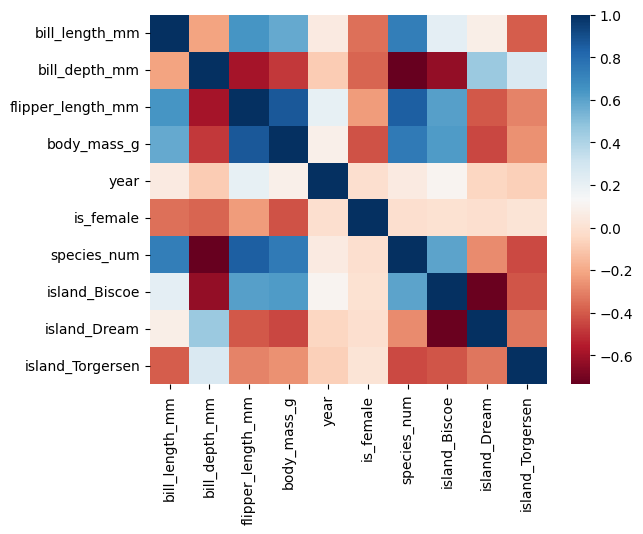

In [22]:
sns.heatmap(corr, cmap="RdBu");

We can compare Pearson correlation coefficient to the results of Phic correlation coefficient[7]. 

interval columns not set, guessing: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


/usr/local/lib/python3.9/dist-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(
/usr/local/lib/python3.9/dist-packages/phik/report.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


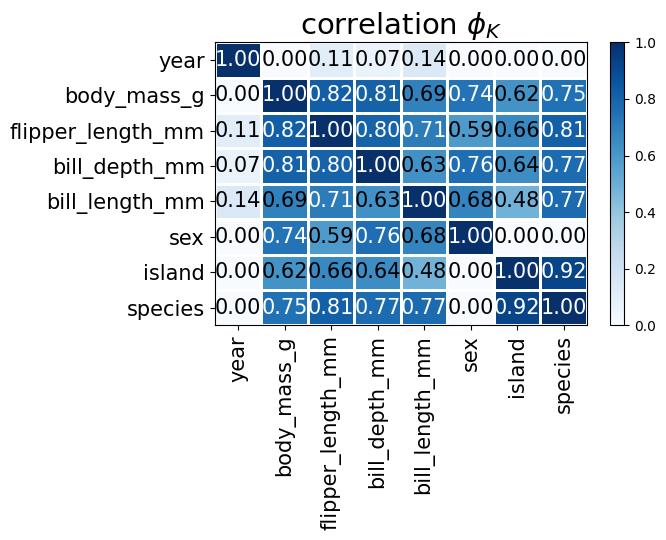

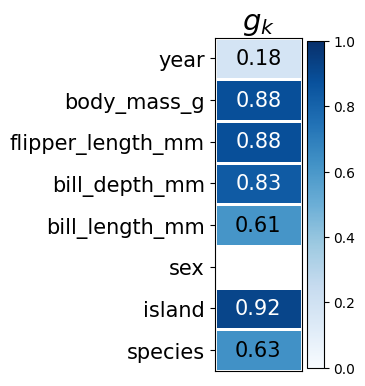

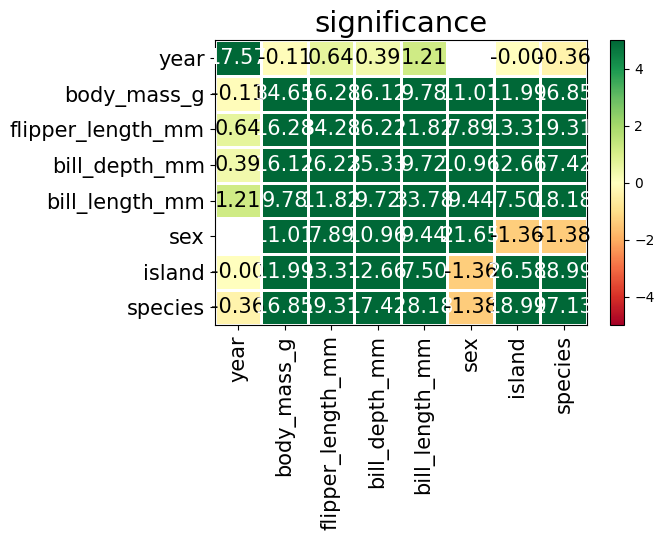

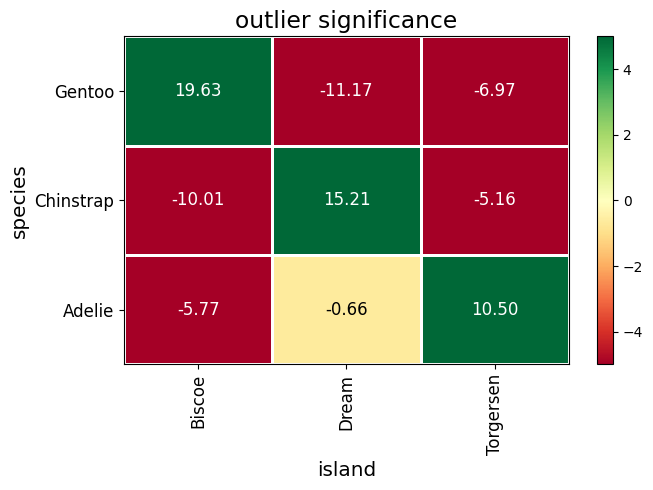

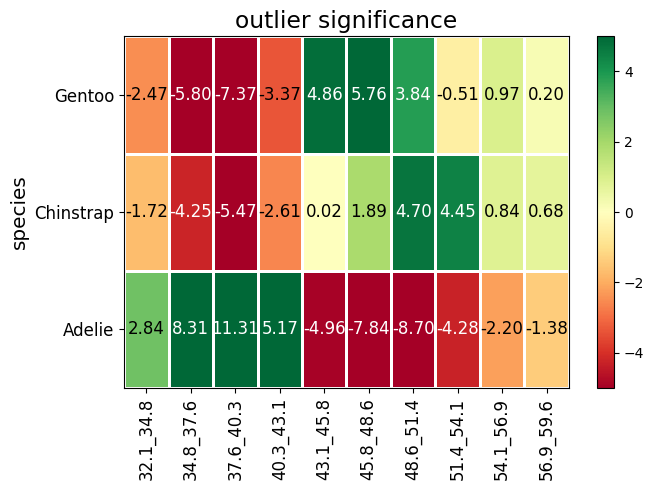

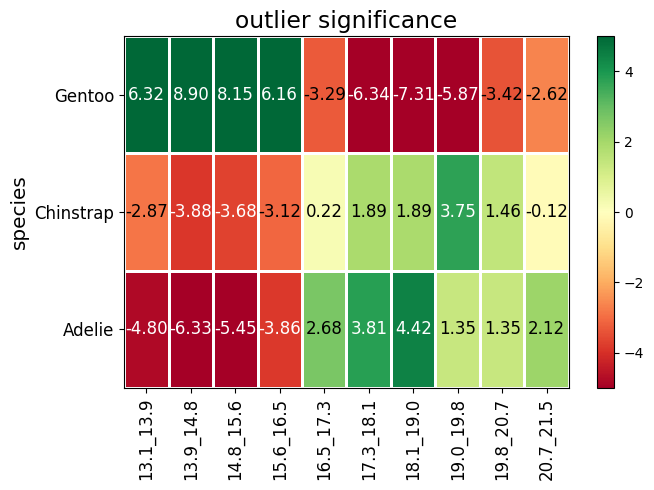

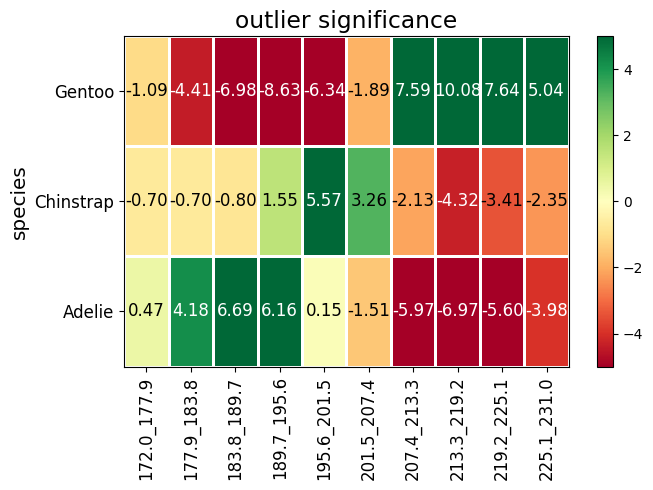

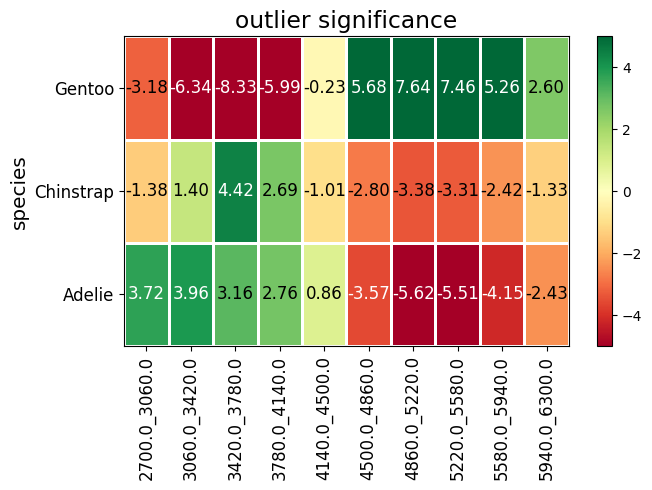

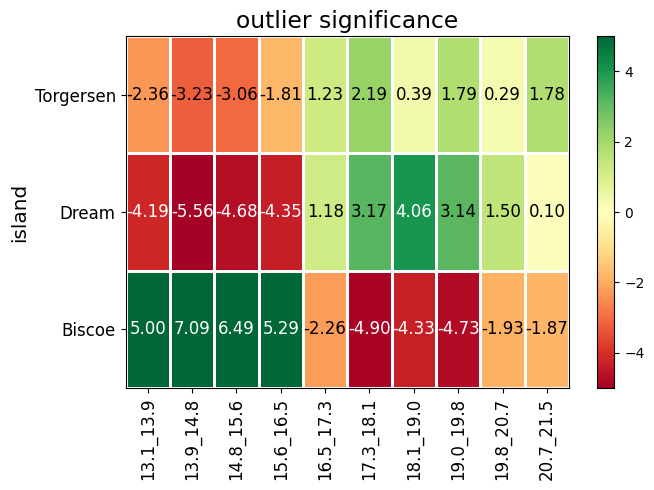

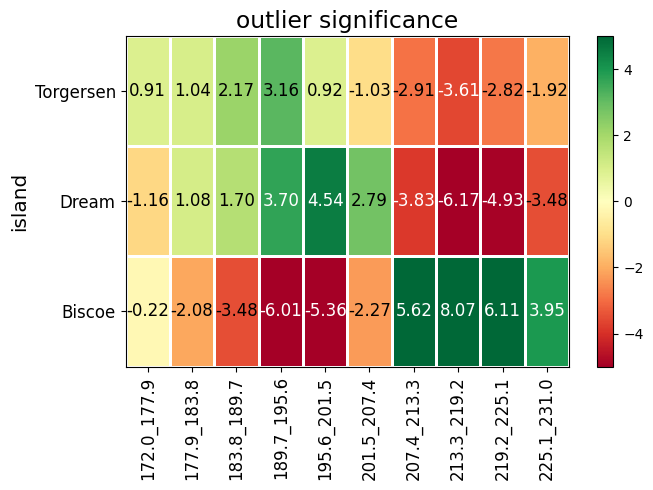

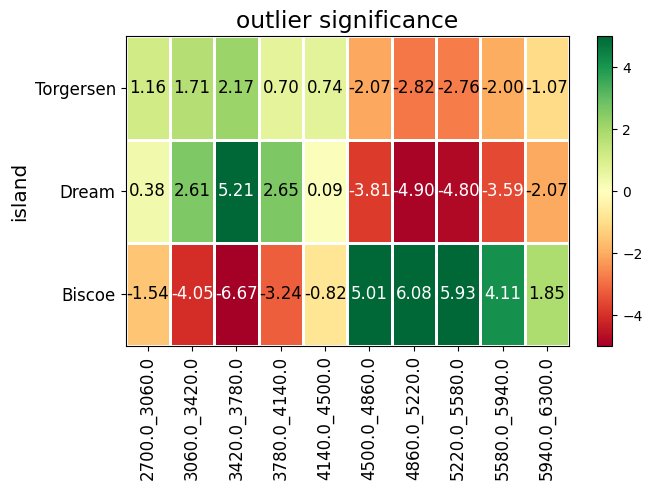

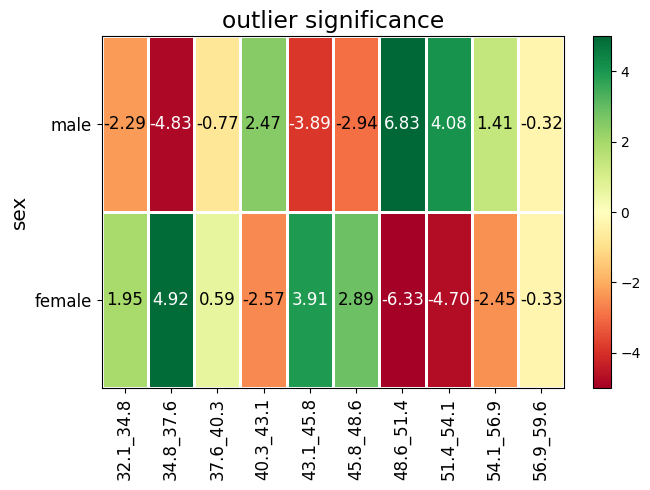

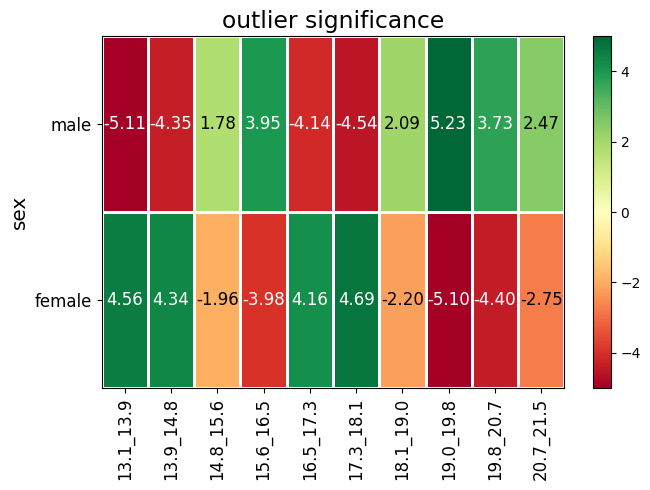

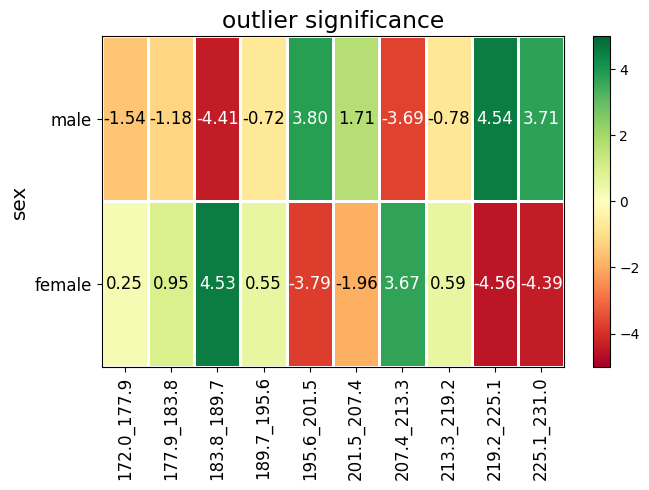

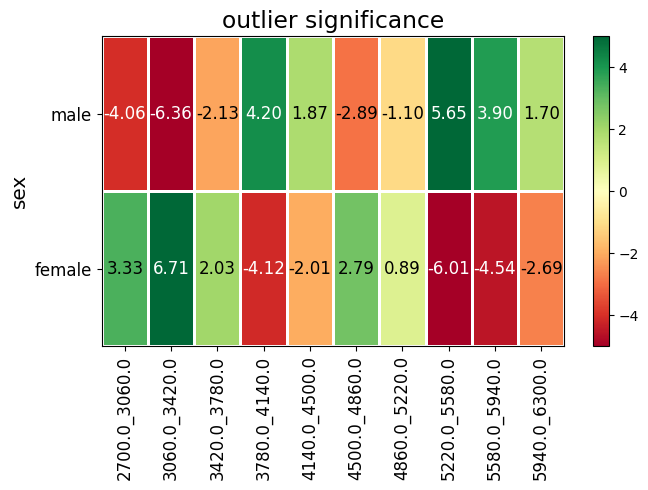

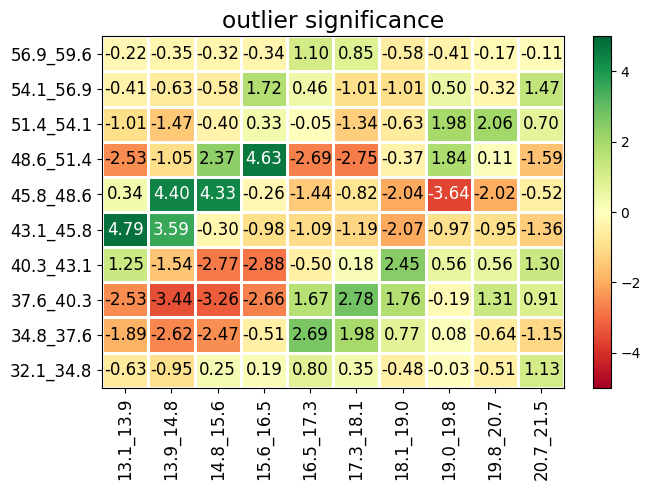

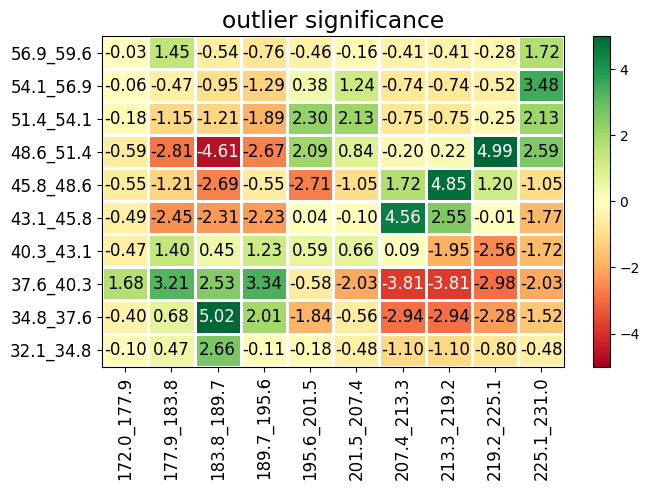

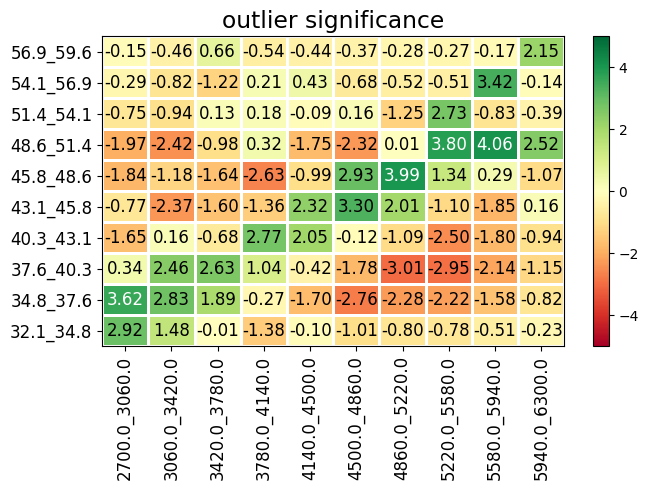

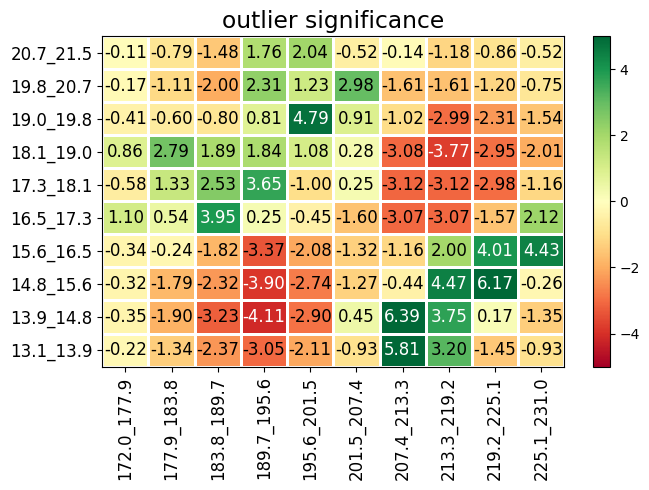

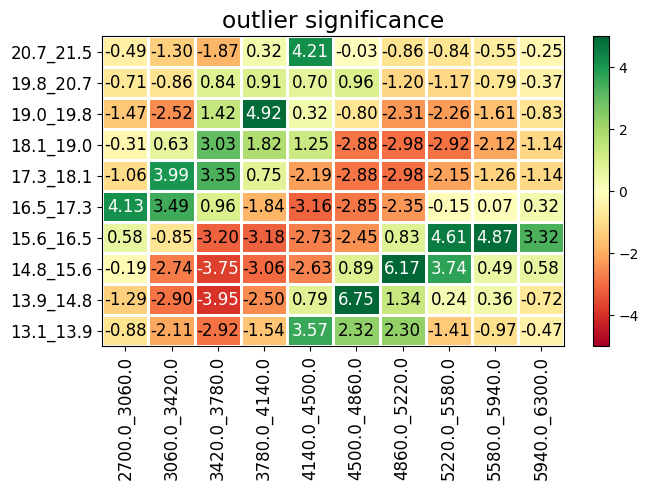

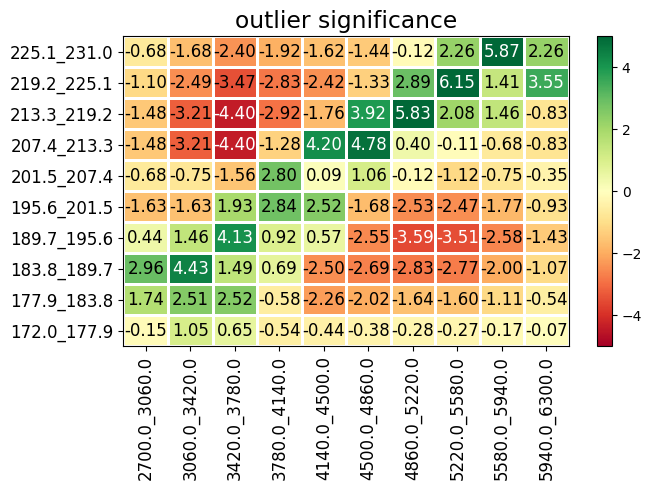

In [23]:
initial_features = ['species', 'island', 'sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
rep = report.correlation_report(data[initial_features], significance_threshold=3, correlation_threshold=0.5)

## Duplicates



If there are duplicates it data we shoulld remove it.

In [24]:
data.duplicated().sum() #number of duplicated rows

11

We don't need those rows and can remove it. 

In [25]:
data = data.drop_duplicates().reset_index(drop=True) #remove duplicates
print(f'Dataframe shape after dropping duplicates: {data.shape}')

Dataframe shape after dropping duplicates: (347, 13)


We can save all the data as interim file.


#3. Data Preparation
(Prepare data to be ingested in the model of your choice. Provide a rationale for the features chosen as part of the training data. If you decide to remove columns or features explain why)



We use 'species' as a target variable (y). 

We exclude `year` variable as it cannot influence the size of the penguin. 

Our explanatory variables are:
- `bill_length_mm`,
- `bill_depth_mm`,
- `flipper_length_mm`, 
- `body_mass_g`.

We decided to make one more dataset, which includes `island` variable and compare results of prediction with and without this variable.expa

In [26]:
data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','is_female']].copy().head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  is_female
0            39.1           18.7              181.0       3750.0        0.0
1            39.5           17.4              186.0       3800.0        1.0
2            40.3           18.0              195.0       3250.0        1.0
3            36.7           19.3              193.0       3450.0        1.0
4            39.3           20.6              190.0       3650.0        0.0

In [27]:
# Split the dataset into training and test part
# assign response and explanatroy variables

SEED = 444
X_train, X_test, y_train, y_test= train_test_split(
    data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','is_female']].copy(), #explanatory
    data[['species_num']], #response
    test_size=0.2, #hold out size
    random_state=SEED
    )
    
#Save testing and training dataset to q pickle file#

#save testing and training data for later use (use list as a container)
with open(r"penguins_train_test.pickle", "wb") as output_file:
    pickle.dump([X_train, y_train, X_test, y_test], output_file) #dump

#This file will be used in later scripts.
#You can load the file containing variables [X_train, y_train, X_test, y_test]
#with open(r"penguins_train_test.pickle", "rb") as input_file:
#    X_train, y_train, X_test, y_test = pickle.load(input_file)


In [28]:
# Create second dataset (with island variable)
# Split the dataset into training and test part
# assign response and explanatroy variables

X1_train, X1_test, y1_train, y1_test= train_test_split(
    data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','is_female', 'island_Biscoe',	'island_Dream',	'island_Torgersen']].copy(), #explanatory
    data[['species_num']], #response
    test_size=0.2, #hold out size
    random_state=SEED
    )
    
#Save testing and training dataset to q pickle file#

#save testing and training data for later use (use list as a container)
with open(r"penguins_with_island_train_test.pickle", "wb") as output_file:
    pickle.dump([X1_train, y1_train, X1_test, y1_test], output_file) #dump

#This file will be used in later scripts.
#You can load the file containing variables [X1_train, y1_train, X1_test, y1_test]
#with open(r"penguins_with_island_train_test.pickle", "rb") as input_file:
#    X1_train, y1_train, X1_test, y1_test = pickle.load(input_file)


#4. Data Visualization

---


Provide plots of different features in the dataset. Example: 	body_mass vs flipper_lenght
What can you conclude about the dataset after doing some data 	visualization?


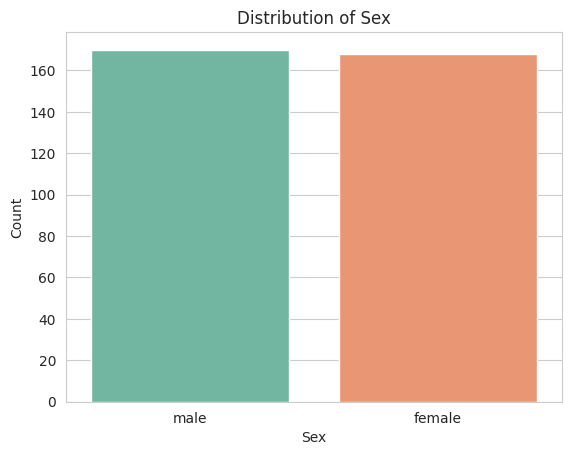

male      170
female    168
Name: sex, dtype: int64


In [29]:
# Set the style of the graph
sns.set_style('whitegrid')

# Create the countplot
sns.countplot(x='sex', data=data, palette='Set2')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

# Show the plot
plt.show()

# Display the count for each category in the column
print(data['sex'].value_counts())


In [30]:
data["flipper_length_mm"].max()

231.0

In [31]:
data["flipper_length_mm"].min()

172.0

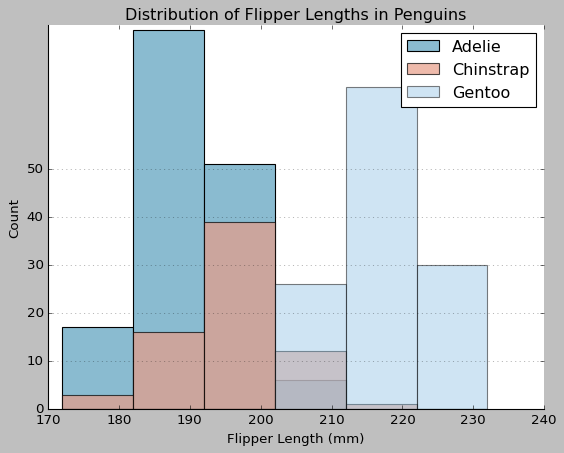

In [32]:
# Set the style of the plot
plt.style.use('classic')

# Create a histogram
plt.hist(data[data['species']=='Adelie']["flipper_length_mm"], bins=np.arange(172,240,10), color="#8abbd0", edgecolor="black", label="Adelie")
plt.hist(data[data['species']=='Chinstrap']["flipper_length_mm"], bins=np.arange(172,240,10), color="#e79d88", edgecolor="black", alpha=0.7, label="Chinstrap")
plt.hist(data[data['species']=='Gentoo']["flipper_length_mm"], bins=np.arange(172,240,10), color="#a0cbe8", edgecolor="black", alpha=0.5, label="Gentoo")

# Set the labels and title of the plot
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")
plt.title("Distribution of Flipper Lengths in Penguins")

# Add a legend
plt.legend()

# Change axis properties
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(np.arange(170, 250, 10))
plt.yticks(np.arange(0, 60, 10))

# Remove the borders of the plot
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Display gridlines
plt.grid(axis='y', alpha=0.5)


# Show the plot
plt.show()


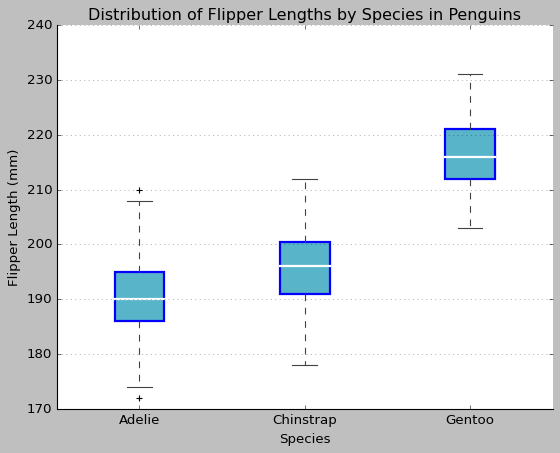

In [33]:
# Set the style of the plot
plt.style.use('classic')

# Create a boxplot
plt.boxplot([data[data['species']=='Adelie']["flipper_length_mm"], 
             data[data['species']=='Chinstrap']["flipper_length_mm"], 
             data[data['species']=='Gentoo']["flipper_length_mm"]], 
            labels=['Adelie', 'Chinstrap', 'Gentoo'],
            patch_artist=True, # Fill the boxes with color
            boxprops=dict(facecolor='#58b4c8', linewidth=2), # Set the box color and width
            whiskerprops=dict(linestyle='--', color='#424242'), # Set the style and color of the whiskers
            capprops=dict(color='#424242'), # Set the color of the caps
            medianprops=dict(color='white', linewidth=2)) # Set the color and width of the median line

# Set the labels and title of the plot
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.title("Distribution of Flipper Lengths by Species in Penguins")

# Change axis properties
plt.tick_params(axis='both', which='major', labelsize=12)

# Remove the borders of the plot
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Display gridlines
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()


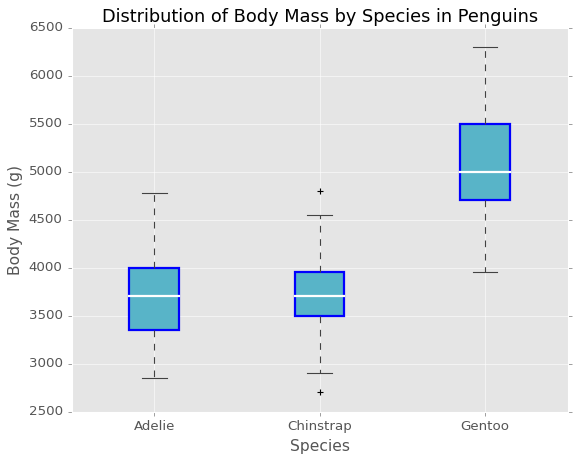

In [34]:
# Set the style of the plot
plt.style.use('ggplot')

# Create the box plot
plt.boxplot([data[data['species']=='Adelie']['body_mass_g'], 
             data[data['species']=='Chinstrap']['body_mass_g'], 
             data[data['species']=='Gentoo']['body_mass_g']], 
            labels=['Adelie', 'Chinstrap', 'Gentoo'],
            patch_artist=True, # Fill the boxes with color
            boxprops=dict(facecolor='#58b4c8', linewidth=2), # Set the box color and width
            whiskerprops=dict(linestyle='--', color='#424242'), # Set the style and color of the whiskers
            capprops=dict(color='#424242'), # Set the color of the caps
            medianprops=dict(color='white', linewidth=2)) # Set the color and width of the median line

# Set the labels and title of the plot
plt.xlabel("Species", fontsize=14)
plt.ylabel("Body Mass (g)", fontsize=14)
plt.title("Distribution of Body Mass by Species in Penguins", fontsize=16)

# Set the font size of the axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the width of the box plot
plt.gcf().set_size_inches(8, 6)

# Show the plot
plt.show()


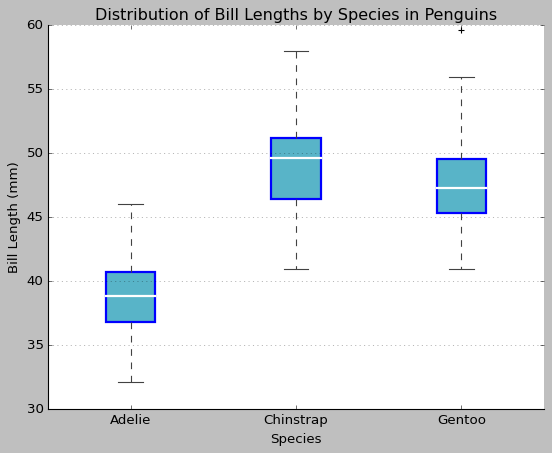

In [35]:
# Set the style of the plot
plt.style.use('classic')

# Create a boxplot
plt.boxplot([data[data['species']=='Adelie']["bill_length_mm"], 
             data[data['species']=='Chinstrap']["bill_length_mm"], 
             data[data['species']=='Gentoo']["bill_length_mm"]], 
            labels=['Adelie', 'Chinstrap', 'Gentoo'],
            patch_artist=True, # Fill the boxes with color
            boxprops=dict(facecolor='#58b4c8', linewidth=2), # Set the box color and width
            whiskerprops=dict(linestyle='--', color='#424242'), # Set the style and color of the whiskers
            capprops=dict(color='#424242'), # Set the color of the caps
            medianprops=dict(color='white', linewidth=2)) # Set the color and width of the median line

# Set the labels and title of the plot
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")
plt.title("Distribution of Bill Lengths by Species in Penguins")

# Change axis properties
plt.tick_params(axis='both', which='major', labelsize=12)

# Remove the borders of the plot
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Display gridlines
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()


Text(0.5, 1.0, 'Distribution of bill length and depth')

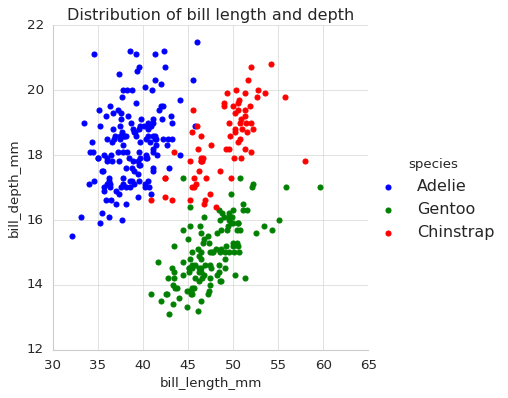

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="species", height=5) \
   .map(plt.scatter, "bill_length_mm", "bill_depth_mm") \
   .add_legend()
plt.title("Distribution of bill length and depth")

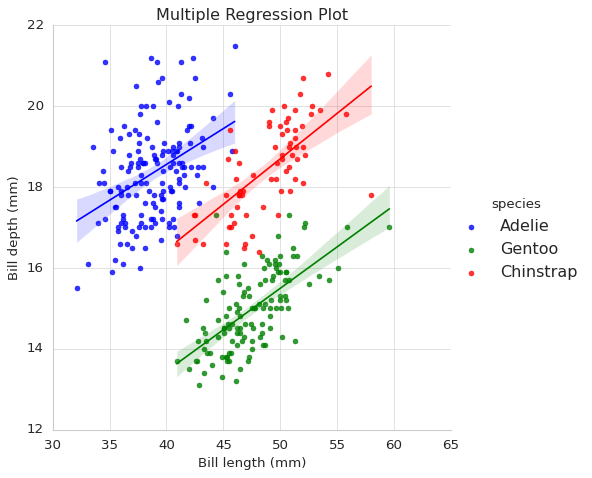

In [37]:
# Regression plot
g = sns.lmplot(data=data,
               x='bill_length_mm', y = 'bill_depth_mm', 
               hue = 'species', height=6)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)')
g.set(title = "Multiple Regression Plot")

Text(0.5, 1.0, 'Distribution of body mass and flipper lenght')

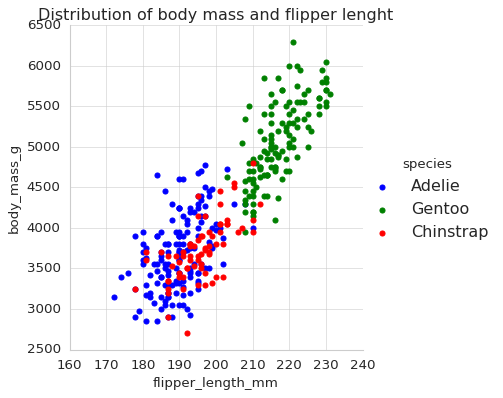

In [38]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="species", height=5) \
   .map(plt.scatter, "flipper_length_mm", "body_mass_g") \
   .add_legend()
plt.title("Distribution of body mass and flipper lenght")

#5. Modeling

Try different models and provide a rationale for your selected model choice and architecture. Describe your validation process. 	Your model report must include the following:
Model limitations and considerations
Ideas to improve the model 
Explain how did you choose the values for the hyper-parameters of your model


# Single Classification Tree

## Single classification tree without island

Loading data from the .pickle file (without islands)

In [39]:
# Load insurance_train_test.pickle file with  X_train, y_train, X_test, y_test variables
with open(r"penguins_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

#Double-checking the variables
print(X_train.head(3))
print(y_train.head(3))

    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  is_female
53            35.0           17.9              190.0       3450.0        1.0
2             40.3           18.0              195.0       3250.0        1.0
49            36.0           17.9              190.0       3450.0        1.0
    species_num
53            0
2             0
49            0


Setting up the hyper-parameters combinations, instantiating DecisionTreeClassifier and setting seed:

In [40]:
#optimize hyper parameters
# Create the grid
hyper_grid = {"max_depth": [2, 3, 4, 5],
               "min_samples_leaf": [0.02, 0.05, 0.1],
               }

#instantiate the model, set seed
tree_model_cv = DecisionTreeClassifier(random_state=SEED)

Fitting the best single-tree model:

In [41]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = tree_model_cv, 
                          param_grid = hyper_grid, 
                          cv = 3, 
                          n_jobs = -1, 
                          verbose = 2
                          )
# Fitting the model using train data and printing best parameters
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)   

# Saving optimal tree and its predicted values
model_cv_opt= grid_search.best_estimator_  
y_pred_cv = model_cv_opt.predict(X_test)

#saving the model as pkl
pickle.dump(model_cv_opt,open("single_tree_WI.pkl", "wb"))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'max_depth': 2, 'min_samples_leaf': 0.02}


Tree confusion matrix and evaluation:

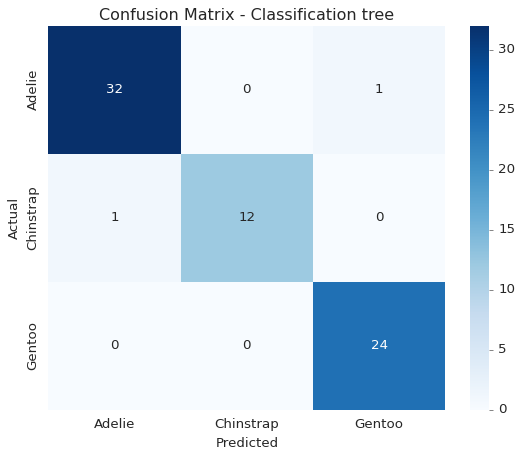

In [42]:
# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_cv)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",             
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Classification tree")
plt.show()

In [43]:
# Evaluate the Single tree classifier on the test set
accuracy_STC_WI = model_cv_opt.score(X_test, y_test)
print("Accuracy:", accuracy_STC_WI)

# Calculate precision
precision_STC_WI = precision_score(y_test, y_pred_cv, average='weighted')
print("Precision (weighted):", precision_STC_WI)

# Calculate recall
recall_STC_WI = recall_score(y_test, y_pred_cv, average='weighted')
print("Recall (weighted):", recall_STC_WI)

# Calculate F1 score
f1_STC_WI = f1_score(y_test, y_pred_cv, average='weighted')
print("F1 score (weighted):", f1_STC_WI)

Accuracy: 0.9714285714285714
Precision (weighted): 0.9719999999999999
Recall (weighted): 0.9714285714285714
F1 score (weighted): 0.9712886297376093


Wrong predictions:

In [44]:
# Finding the wrong predictions
Get_penguin = (y_pred_cv!= y_test["species_num"])
X_tested = X_test.copy()
X_tested["Expected"] = y_test
X_tested["Predicted"] = pd.DataFrame(y_pred_cv, index=X_test.index)
X_tested[Get_penguin]

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  is_female  \
333            42.5           17.3              187.0       3350.0        1.0   
130            44.1           18.0              210.0       4000.0        0.0   

     Expected  Predicted  
333         1          0  
130         0          2

Plotting the best tree:

[Text(0.5, 0.8333333333333334, 'flipper_length_mm <= 206.5\ngini = 0.641\nsamples = 277\nvalue = [120, 58, 99]\nclass = Adelie'),
 Text(0.25, 0.5, 'bill_length_mm <= 43.35\ngini = 0.433\nsamples = 173\nvalue = [119, 53, 1]\nclass = Adelie'),
 Text(0.125, 0.16666666666666666, 'gini = 0.065\nsamples = 119\nvalue = [115, 4, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'gini = 0.171\nsamples = 54\nvalue = [4, 49, 1]\nclass = Chinstrap'),
 Text(0.75, 0.5, 'bill_depth_mm <= 18.1\ngini = 0.11\nsamples = 104\nvalue = [1, 5, 98]\nclass = Gentoo'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 98\nvalue = [0, 0, 98]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.278\nsamples = 6\nvalue = [1, 5, 0]\nclass = Chinstrap')]

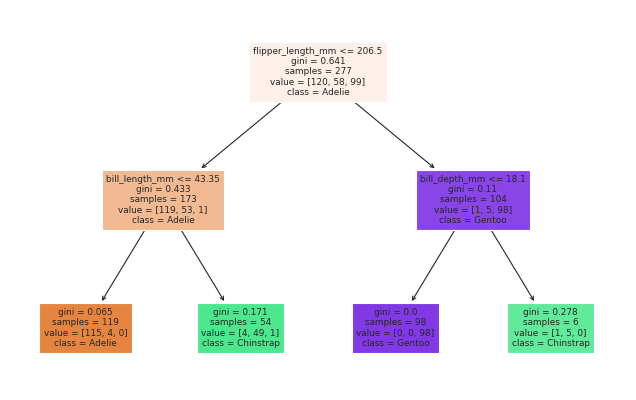

In [45]:
#plot the tree
plt.figure(figsize=(10,6))
tree.plot_tree(model_cv_opt, 
               feature_names=list(X_test),
               class_names = ['Adelie', 'Chinstrap', 'Gentoo'],
               filled=True, 
               fontsize=8)

## Single classification tree with islands

Loading data from the .pickle file (with islands)

In [46]:
# Load insurance_train_test.pickle file with  X_train, y_train, X_test, y_test variables
with open(r"penguins_with_island_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

#Double-checking the variables
print(X_train.head(3))
print(y_train.head(3))

    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  is_female  \
53            35.0           17.9              190.0       3450.0        1.0   
2             40.3           18.0              195.0       3250.0        1.0   
49            36.0           17.9              190.0       3450.0        1.0   

    island_Biscoe  island_Dream  island_Torgersen  
53              1             0                 0  
2               0             0                 1  
49              0             1                 0  
    species_num
53            0
2             0
49            0


Setting up the hyper-parameters combinations, instantiating DecisionTreeClassifier and setting seed:

In [47]:
#optimize hyper parameters
# Create the grid
hyper_grid = {"max_depth": [2, 3, 4, 5],
               "min_samples_leaf": [0.02, 0.05, 0.1],
               }

#instantiate the model, set seed
tree_model_cv = DecisionTreeClassifier(random_state=SEED)

Fitting the best single-tree model:

In [48]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = tree_model_cv, 
                          param_grid = hyper_grid, 
                          cv = 3, 
                          n_jobs = -1, 
                          verbose = 2
                          )

# Fitting the model using train data and printing best parameters
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)   

# Saving optimal tree and its predicted values
model_cv_opt= grid_search.best_estimator_  
y_pred_cv = model_cv_opt.predict(X_test)

#saving the model as pkl
pickle.dump(model_cv_opt,open("single_tree_I.pkl", "wb"))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'max_depth': 2, 'min_samples_leaf': 0.02}


Tree confusion matrix and evaluation:

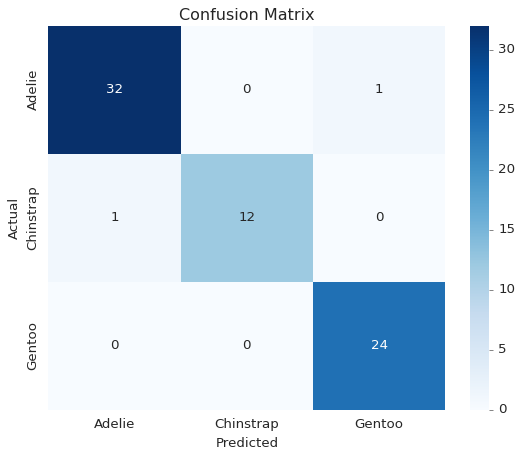

In [49]:
# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_cv)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",             
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
# Evaluate the Single tree classifier on the test set
accuracy_STC_I = model_cv_opt.score(X_test, y_test)
print("Accuracy:", accuracy_STC_I)

# Calculate precision
precision_STC_I = precision_score(y_test, y_pred_cv, average='weighted')
print("Precision (weighted):", precision_STC_I)

# Calculate recall
recall_STC_I = recall_score(y_test, y_pred_cv, average='weighted')
print("Recall (weighted):", recall_STC_I)

# Calculate F1 score
f1_STC_I = f1_score(y_test, y_pred_cv, average='weighted')
print("F1 score (weighted):", f1_STC_I)

Accuracy: 0.9714285714285714
Precision (weighted): 0.9719999999999999
Recall (weighted): 0.9714285714285714
F1 score (weighted): 0.9712886297376093


Wrong predictions:

In [51]:
# Finding the wrong predictions
Get_penguin = (y_pred_cv!= y_test["species_num"])
X_tested = X_test.copy()
X_tested["Expected"] = y_test
X_tested["Predicted"] = pd.DataFrame(y_pred_cv, index=X_test.index)
X_tested[Get_penguin]

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  is_female  \
333            42.5           17.3              187.0       3350.0        1.0   
130            44.1           18.0              210.0       4000.0        0.0   

     island_Biscoe  island_Dream  island_Torgersen  Expected  Predicted  
333              0             1                 0         1          0  
130              0             0                 1         0          2

Plotting the best tree:

[Text(0.5, 0.8333333333333334, 'flipper_length_mm <= 206.5\ngini = 0.641\nsamples = 277\nvalue = [120, 58, 99]\nclass = Adelie'),
 Text(0.25, 0.5, 'bill_length_mm <= 43.35\ngini = 0.433\nsamples = 173\nvalue = [119, 53, 1]\nclass = Adelie'),
 Text(0.125, 0.16666666666666666, 'gini = 0.065\nsamples = 119\nvalue = [115, 4, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'gini = 0.171\nsamples = 54\nvalue = [4, 49, 1]\nclass = Chinstrap'),
 Text(0.75, 0.5, 'island_Dream <= 0.5\ngini = 0.11\nsamples = 104\nvalue = [1, 5, 98]\nclass = Gentoo'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 98\nvalue = [0, 0, 98]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.278\nsamples = 6\nvalue = [1, 5, 0]\nclass = Chinstrap')]

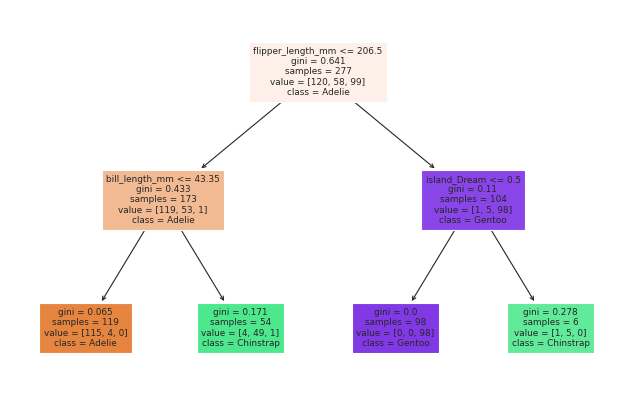

In [52]:
#plot the tree
plt.figure(figsize=(10,6))
tree.plot_tree(model_cv_opt, 
               feature_names=list(X_train.columns), 
               class_names = ['Adelie', 'Chinstrap', 'Gentoo'],
               filled=True, 
               fontsize=8)

#Logistic Regression

##Without variable Island

In [53]:
# Load insurance_train_test.pickle file with  X_train, y_train, X_test, y_test variables
with open(r"penguins_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

In [54]:
X_train.describe() 

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      277.000000     277.000000         277.000000   277.000000   
mean        44.103249      17.185199         201.170036  4223.736462   
std          5.466925       1.975749          13.911991   802.296992   
min         32.100000      13.100000         172.000000  2850.000000   
25%         39.500000      15.700000         190.000000  3575.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         49.000000      18.700000         213.000000  4800.000000   
max         58.000000      21.500000         231.000000  6300.000000   

        is_female  
count  277.000000  
mean     0.483755  
std      0.500641  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [55]:
X_test.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count       70.000000      70.000000          70.000000    70.000000   
mean        43.292857      17.120000         199.171429  4063.214286   
std          5.426914       1.959044          14.429209   791.001491   
min         33.100000      13.500000         178.000000  2700.000000   
25%         38.450000      15.450000         187.500000  3500.000000   
50%         43.150000      17.300000         194.500000  3900.000000   
75%         46.875000      18.600000         212.250000  4662.500000   
max         59.600000      21.100000         230.000000  6050.000000   

       is_female  
count  70.000000  
mean    0.585714  
std     0.496155  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     1.000000  
max     1.000000

array([[<Axes: title={'center': 'species_num'}>]], dtype=object)

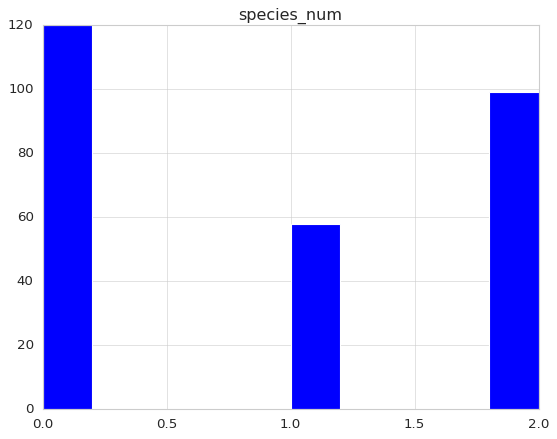

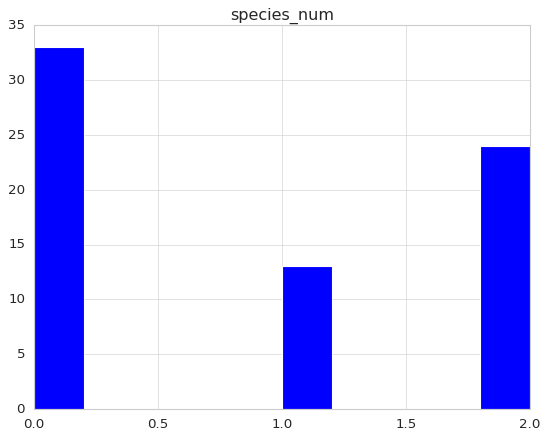

In [56]:
y_train.hist()
y_test.hist()

In [57]:
logistic_model = LogisticRegression(
  multi_class = "multinomial",
  #penalty = 'none', # {'l1', 'l2', 'elasticnet', 'none'}
  fit_intercept = True,
  random_state = SEED) 

In [58]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.1, 1, 10, 100]}

In [59]:
# Create an instance of GridSearchCV CV5
grid_search1 = GridSearchCV(logistic_model, param_grid, cv=5)

# Fit the grid search to the data
grid_search1.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=444),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [60]:
# Create an instance of GridSearchCV CV4
grid_search2 = GridSearchCV(logistic_model, param_grid, cv=4)

# Fit the grid search to the data
grid_search2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
32 fits failed out of a total of 64.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=4,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=444),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [61]:
# Create an instance of GridSearchCV CV 6 
grid_search3 = GridSearchCV(logistic_model, param_grid, cv=6)

# Fit the grid search to the data
grid_search3.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=6,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=444),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [62]:
# Print the best hyperparameters and the corresponding score
print("CV5 - Best hyperparameters: ", grid_search1.best_params_)
print("CV5 - Best score: ", grid_search1.best_score_)

print("CV4 - Best hyperparameters: ", grid_search2.best_params_)
print("CV4 - Best score: ", grid_search2.best_score_)

print("CV6 - Best hyperparameters: ", grid_search3.best_params_)
print("CV6 - Best score: ", grid_search3.best_score_)

CV5 - Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
CV5 - Best score:  0.982012987012987
CV4 - Best hyperparameters:  {'C': 0.1, 'penalty': 'none'}
CV4 - Best score:  0.978416149068323
CV6 - Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
CV6 - Best score:  0.9820382362010484


In [63]:
logistic_model = LogisticRegression(
  multi_class = "multinomial",
  penalty = "l2",
  C = 10,
  fit_intercept = True,
  random_state = SEED) 

In [64]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=444)

In [65]:
# See coefficients
logistic_model.classes_
logistic_model.coef_
logistic_model.intercept_

array([ 0.06907565, -0.02635292, -0.04272273])

In [66]:
# Score method to get accuracy of model ((TP+TN)/total)
logistic_model.score(X_train, y_train)

1.0

In [67]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

In [68]:
confusion_matrix_LogReg_WI = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix_LogReg_WI

array([[32,  1,  0],
       [ 1, 12,  0],
       [ 0,  0, 24]])

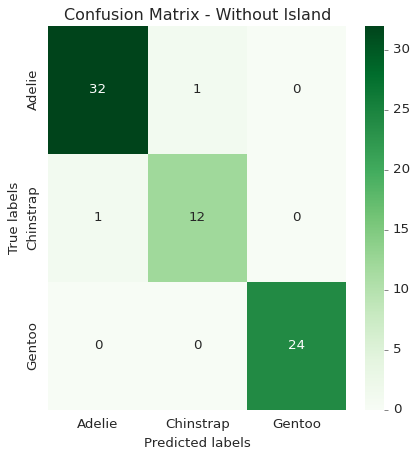

In [69]:
# assume conf_matrix is your confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix_LogReg_WI, annot=True, cmap='Greens', fmt='g',
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Without Island')
plt.show()

**Precision:** Precision is a measure of how many of the predicted positive cases are actually positive. In other words, it is the ratio of true positives to the total number of predicted positives.

**Recall:** Recall is a measure of how many of the actual positive cases are correctly predicted. In other words, it is the ratio of true positives to the total number of actual positives.

**F1 score:** F1 score is a measure of the balance between precision and recall. It is the harmonic mean of precision and recall, and takes into account both measures.

**Macro:** Macro-averaging computes the metric independently for each class and then takes the average across all classes. This method gives equal weight to each class, regardless of the class distribution.

**Micro:** Micro-averaging aggregates the contributions of all classes to compute the metric. This method gives more weight to larger classes.

**Weighted: **Weighted-averaging computes the metric for each class and then takes the average, weighted by the number of samples in each class. This method gives more weight to the smaller classes.

In [70]:
# Calculate accuracy
accuracy_LogReg_WI = accuracy_score(y_test, y_pred)
print("-------------------MODEL WITHOUT VARIABLE ISLAND-------------------")
print("Accuracy:", accuracy_LogReg_WI)

# Calculate precision
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_LogReg_WI = precision_score(y_test, y_pred, average='weighted')
print("Precision (macro):", precision_macro)
print("Precision (micro):", precision_micro)
print("Precision (weighted):", precision_LogReg_WI)

# Calculate recall
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_LogReg_WI = recall_score(y_test, y_pred, average='weighted')
print("Recall (macro):", recall_macro)
print("Recall (micro):", recall_micro)
print("Recall (weighted):", recall_LogReg_WI)

# Calculate F1 score
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_LogReg_WI = f1_score(y_test, y_pred, average='weighted')
print("F1 score (macro):", f1_macro)
print("F1 score (micro):", f1_micro)
print("F1 score (weighted):", f1_LogReg_WI)

-------------------MODEL WITHOUT VARIABLE ISLAND-------------------
Accuracy: 0.9714285714285714
Precision (macro): 0.9642579642579644
Precision (micro): 0.9714285714285714
Precision (weighted): 0.9714285714285714
Recall (macro): 0.9642579642579644
Recall (micro): 0.9714285714285714
Recall (weighted): 0.9714285714285714
F1 score (macro): 0.9642579642579644
F1 score (micro): 0.9714285714285714
F1 score (weighted): 0.9714285714285714


In [71]:
metrics.classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97        33\n           1       0.92      0.92      0.92        13\n           2       1.00      1.00      1.00        24\n\n    accuracy                           0.97        70\n   macro avg       0.96      0.96      0.96        70\nweighted avg       0.97      0.97      0.97        70\n'

###Save model to H5 **format**

In [72]:
import pickle
# save the model to disk
filename = 'logistic_regression.pkl'
pickle.dump(logistic_model, open(filename, 'wb'))

In [73]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9714285714285714


##With variable Island

In [74]:
# Load insurance_train_test.pickle file with  X_train, y_train, X_test, y_test variables
with open(r"penguins_with_island_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

In [75]:
logistic_model_island = LogisticRegression(
  multi_class = "multinomial",
  #penalty = 'none', # {'l1', 'l2', 'elasticnet', 'none'}
  fit_intercept = True,
  random_state = SEED) 

In [76]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.1, 1, 10, 100]}

In [77]:
# Create an instance of GridSearchCV CV5
grid_search1 = GridSearchCV(logistic_model_island, param_grid, cv=5)

# Fit the grid search to the data
grid_search1.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=444),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [78]:
# Create an instance of GridSearchCV CV4
grid_search2 = GridSearchCV(logistic_model_island, param_grid, cv=4)

# Fit the grid search to the data
grid_search2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
32 fits failed out of a total of 64.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=4,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=444),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [79]:
# Create an instance of GridSearchCV CV 6 
grid_search3 = GridSearchCV(logistic_model_island, param_grid, cv=6)

# Fit the grid search to the data
grid_search3.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=6,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=444),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [80]:
# Print the best hyperparameters and the corresponding score
print("CV5 - Best hyperparameters: ", grid_search1.best_params_)
print("CV5 - Best score: ", grid_search1.best_score_)

print("CV4 - Best hyperparameters: ", grid_search2.best_params_)
print("CV4 - Best score: ", grid_search2.best_score_)

print("CV6 - Best hyperparameters: ", grid_search3.best_params_)
print("CV6 - Best score: ", grid_search3.best_score_)

CV5 - Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
CV5 - Best score:  0.982012987012987
CV4 - Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
CV4 - Best score:  0.9820393374741201
CV6 - Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
CV6 - Best score:  0.9820382362010484


In [81]:
logistic_model_island = LogisticRegression(
  multi_class = "multinomial",
  penalty = "l2",
  C = 0.1,
  fit_intercept = True,
  random_state = SEED) 

In [82]:
logistic_model_island.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial', random_state=444)

In [83]:
# See coefficients
logistic_model_island.classes_
logistic_model_island.coef_
logistic_model_island.intercept_

array([ 0.02000707, -0.00639108, -0.013616  ])

In [84]:
# Score method to get accuracy of model ((TP+TN)/total)
logistic_model_island.score(X_train, y_train)

0.9927797833935018

In [85]:
# Make predictions on the test data
y_pred = logistic_model_island.predict(X_test)

In [86]:
confusion_matrix_LogReg_I = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix_LogReg_I

array([[32,  1,  0],
       [ 2, 11,  0],
       [ 0,  0, 24]])

In [87]:
import pickle
# save the model to disk
filename = 'logistic_regression_island.pkl'
pickle.dump(logistic_model_island, open(filename, 'wb'))

In [88]:
"""model_island = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)
"""

"model_island = pickle.load(open(filename, 'rb'))\nresult = loaded_model.score(X_test, y_test)\nprint(result)\n"

**Precision:** Precision is a measure of how many of the predicted positive cases are actually positive. In other words, it is the ratio of true positives to the total number of predicted positives.

**Recall:** Recall is a measure of how many of the actual positive cases are correctly predicted. In other words, it is the ratio of true positives to the total number of actual positives.

**F1 score:** F1 score is a measure of the balance between precision and recall. It is the harmonic mean of precision and recall, and takes into account both measures.

**Macro:** Macro-averaging computes the metric independently for each class and then takes the average across all classes. This method gives equal weight to each class, regardless of the class distribution.

**Micro:** Micro-averaging aggregates the contributions of all classes to compute the metric. This method gives more weight to larger classes.

**Weighted: **Weighted-averaging computes the metric for each class and then takes the average, weighted by the number of samples in each class. This method gives more weight to the smaller classes.

In [89]:
# Calculate accuracy
accuracy_LogReg_I = accuracy_score(y_test, y_pred)
print("-------------------MODEL WITH VARIABLE ISLAND-------------------")
print("Accuracy with Island:", accuracy_LogReg_I)

# Calculate precision
precision_macro_island = precision_score(y_test, y_pred, average='macro')
precision_micro_island = precision_score(y_test, y_pred, average='micro')
precision_weighted_LogReg_I = precision_score(y_test, y_pred, average='weighted')
print("Precision (macro):", precision_macro_island)
print("Precision (micro):", precision_micro_island)
print("Precision (weighted):", precision_weighted_LogReg_I)

# Calculate recall
recall_macro_island = recall_score(y_test, y_pred, average='macro')
recall_micro_island = recall_score(y_test, y_pred, average='micro')
recall_weighted_LogReg_I = recall_score(y_test, y_pred, average='weighted')
print("Recall (macro):", recall_macro_island)
print("Recall (micro):", recall_micro_island)
print("Recall (weighted):", recall_weighted_LogReg_I)

# Calculate F1 score
f1_macro_island = f1_score(y_test, y_pred, average='macro')
f1_micro_island = f1_score(y_test, y_pred, average='micro')
f1_LogReg_I = f1_score(y_test, y_pred, average='weighted')
print("F1 score (macro):", f1_macro_island)
print("F1 score (micro):", f1_micro_island)
print("F1 score (weighted):", f1_LogReg_I)

-------------------MODEL WITH VARIABLE ISLAND-------------------
Accuracy with Island: 0.9571428571428572
Precision (macro): 0.9526143790849674
Precision (micro): 0.9571428571428572
Precision (weighted): 0.9567927170868347
Recall (macro): 0.9386169386169386
Recall (micro): 0.9571428571428572
Recall (weighted): 0.9571428571428572
F1 score (macro): 0.9450746268656717
F1 score (micro): 0.9571428571428572
F1 score (weighted): 0.9566055437100214


In [90]:
"""Models_comparison = pd.DataFrame({
    'Model': ['With Island', 'Without Island', 'Comparison'],
    'Accuracy': [accuracy_LogReg_I, accuracy_LogReg_WI, accuracy_LogReg_I - accuracy_LogReg_WI],
    #'Precision macro': [precision_macro_island, precision_macro, precision_macro_island-precision_macro],
    #'Precision micro': [precision_micro_island, precision_micro, precision_micro_island-precision_micro],
    'Precision weighted': [precision_weighted_LogReg_I, precision_LogReg_WI, precision_weighted_LogReg_I-precision_LogReg_WI],
    #'Recall macro': [recall_macro_island, recall_macro, recall_macro_island-recall_macro],
    #'Recall micro': [recall_micro_island, recall_micro, recall_micro_island-recall_micro],
    'Recall weighted': [recall_weighted_LogReg_I, recall_LogReg_WI, recall_weighted_LogReg_I-recall_LogReg_WI],
    #'F1 score macro': [f1_macro_island, f1_macro, f1_macro_island-f1_macro],
    #'F1 score micro': [f1_micro_island, f1_micro, f1_micro_island-f1_micro],
    'F1 score weighted': [f1_LogReg_I, f1_LogReg_WI, f1_weighted_LogReg_I-f1_LogReg_WI],
})

print(Models_comparison)"""

"Models_comparison = pd.DataFrame({\n    'Model': ['With Island', 'Without Island', 'Comparison'],\n    'Accuracy': [accuracy_LogReg_I, accuracy_LogReg_WI, accuracy_LogReg_I - accuracy_LogReg_WI],\n    #'Precision macro': [precision_macro_island, precision_macro, precision_macro_island-precision_macro],\n    #'Precision micro': [precision_micro_island, precision_micro, precision_micro_island-precision_micro],\n    'Precision weighted': [precision_weighted_LogReg_I, precision_LogReg_WI, precision_weighted_LogReg_I-precision_LogReg_WI],\n    #'Recall macro': [recall_macro_island, recall_macro, recall_macro_island-recall_macro],\n    #'Recall micro': [recall_micro_island, recall_micro, recall_micro_island-recall_micro],\n    'Recall weighted': [recall_weighted_LogReg_I, recall_LogReg_WI, recall_weighted_LogReg_I-recall_LogReg_WI],\n    #'F1 score macro': [f1_macro_island, f1_macro, f1_macro_island-f1_macro],\n    #'F1 score micro': [f1_micro_island, f1_micro, f1_micro_island-f1_micro],\n 

In [91]:
Models_comparison = pd.DataFrame({
    'Model': ['With Island', 'Without Island', 'Comparison'],
    'Accuracy': [accuracy_LogReg_I, accuracy_LogReg_WI, accuracy_LogReg_I - accuracy_LogReg_WI],
    'Precision weighted': [precision_weighted_LogReg_I, precision_LogReg_WI, precision_weighted_LogReg_I - precision_LogReg_WI],
    'Recall weighted': [recall_weighted_LogReg_I, recall_LogReg_WI, recall_weighted_LogReg_I - recall_LogReg_WI],
    'F1 score weighted': [f1_LogReg_I, f1_LogReg_WI, f1_LogReg_I - f1_LogReg_WI],
})

print(Models_comparison)


            Model  Accuracy  Precision weighted  Recall weighted  \
0     With Island  0.957143            0.956793         0.957143   
1  Without Island  0.971429            0.971429         0.971429   
2      Comparison -0.014286           -0.014636        -0.014286   

   F1 score weighted  
0           0.956606  
1           0.971429  
2          -0.014823  


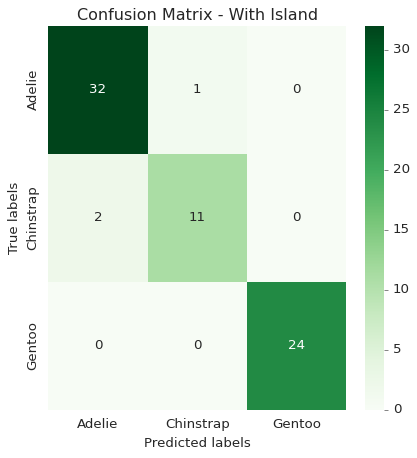

In [92]:
# assume conf_matrix is your confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix_LogReg_I, annot=True, cmap='Greens', fmt='g',
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - With Island')
plt.show()


#XGBagging + XGBoosting

In [93]:
# Load the dataset
with open(r"penguins_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

# Convert string labels to numeric values
train_labels_numeric = np.array(y_train)
test_labels_numeric = np.array(y_test)

# Count the number of samples in each class
train_class_counts = {label: np.sum(train_labels_numeric == label) for label in np.unique(train_labels_numeric)}
test_class_counts = {label: np.sum(test_labels_numeric == label) for label in np.unique(test_labels_numeric)}

# Print the class counts
print("Train Class Counts:", train_class_counts)
print("Test Class Counts:", test_class_counts)


Train Class Counts: {0: 120, 1: 58, 2: 99}
Test Class Counts: {0: 33, 1: 13, 2: 24}


##Boosting

###Early stop increment

In [94]:
# Load penguins_train_test.pickle file with X_train, y_train, X_test, y_test variables
with open(r"penguins_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

SEED = 420

# Instantiate an XGBoost regressor
params = {'colsample_bytree': 1,
          'learning_rate': 0.1, 
          'max_depth': 3, 
          'n_estimators': 250,
          'subsample': 0.8}

# Instantiate xgb.XGBRegressor
gbm = xgboost.XGBRegressor(**params, objective='reg:squarederror', seed=SEED)

# Perform cross-validation with early stopping
eval_set = [(X_train, y_train), (X_test, y_test)]

# Define hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [10, 25, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

# Update model with best hyperparameters
gbm_best = xgboost.XGBRegressor(**best_params, objective='reg:squarederror', seed=SEED)
gbm_best.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=True)

# Make predictions
y_train_pred = gbm_best.predict(X_train)
y_test_pred = gbm_best.predict(X_test)

# Calculate RMSE
XGB_rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
XGB_rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate MSE
XGB_mse_train = mean_squared_error(y_train, y_train_pred)
XGB_mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate MAE
XGB_mae_train = mean_absolute_error(y_train, y_train_pred)
XGB_mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared score
XGB_r2_train = r2_score(y_train, y_train_pred)
XGB_r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Train RMSE:", XGB_rmse_train)
print("Test RMSE:", XGB_rmse_test)
print("Train MSE:", XGB_mse_train)
print("Test MSE:", XGB_mse_test)
print("Train MAE:", XGB_mae_train)
print("Test MAE:", XGB_mae_test)
print("Train R-squared score:", XGB_r2_train)
print("Test R-squared score:", XGB_r2_test)


Best Hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.6}
[0]	validation_0-rmse:0.79474	validation_1-rmse:0.78316
[1]	validation_0-rmse:0.64217	validation_1-rmse:0.64076
[2]	validation_0-rmse:0.52151	validation_1-rmse:0.52885
[3]	validation_0-rmse:0.42169	validation_1-rmse:0.44407
[4]	validation_0-rmse:0.34152	validation_1-rmse:0.37919
[5]	validation_0-rmse:0.27841	validation_1-rmse:0.33121
[6]	validation_0-rmse:0.22837	validation_1-rmse:0.29935
[7]	validation_0-rmse:0.18750	validation_1-rmse:0.27909
[8]	validation_0-rmse:0.15598	validation_1-rmse:0.26595
[9]	validation_0-rmse:0.13073	validation_1-rmse:0.25268
[10]	validation_0-rmse:0.11348	validation_1-rmse:0.24757
[11]	validation_0-rmse:0.09801	validation_1-rmse:0.24553
[12]	validation_0-rmse:0.08520	validation_1-rmse:0.24430
[13]	validation_0-rmse:0.07433	validation_1-rmse:0.24497
[14]	validation_0-rmse:0.06729	validation_1-rmse:0.24170
[15]	validation_0-rmse:0.06034

In [95]:
with open("gbm_best_model.pickle", "wb") as output_file:
    pickle.dump(gbm_best, output_file)

## Bagging

###Bagged random forest without island

Accuracy: 0.9857142857142858


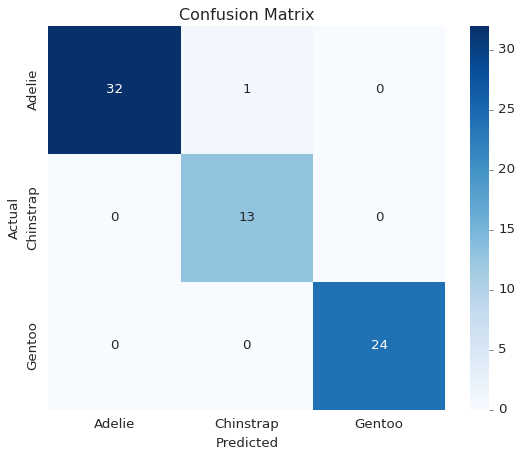

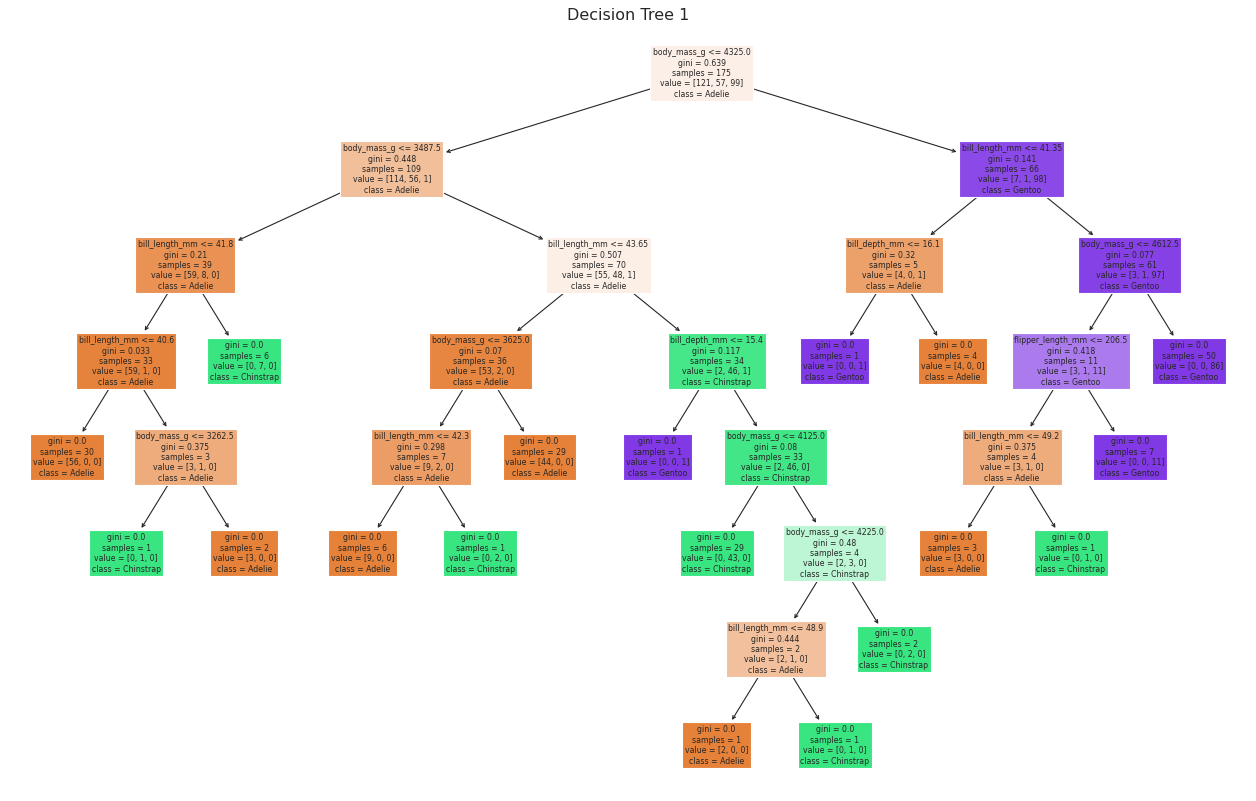

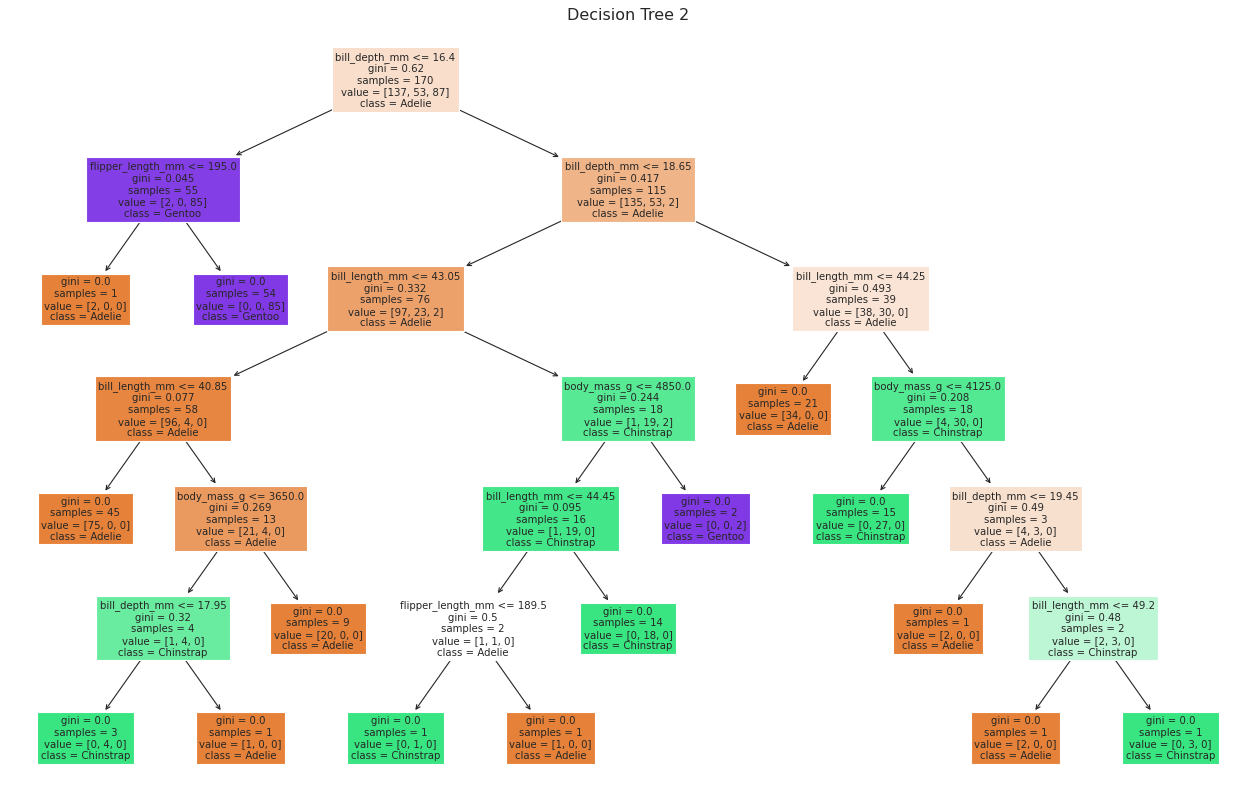

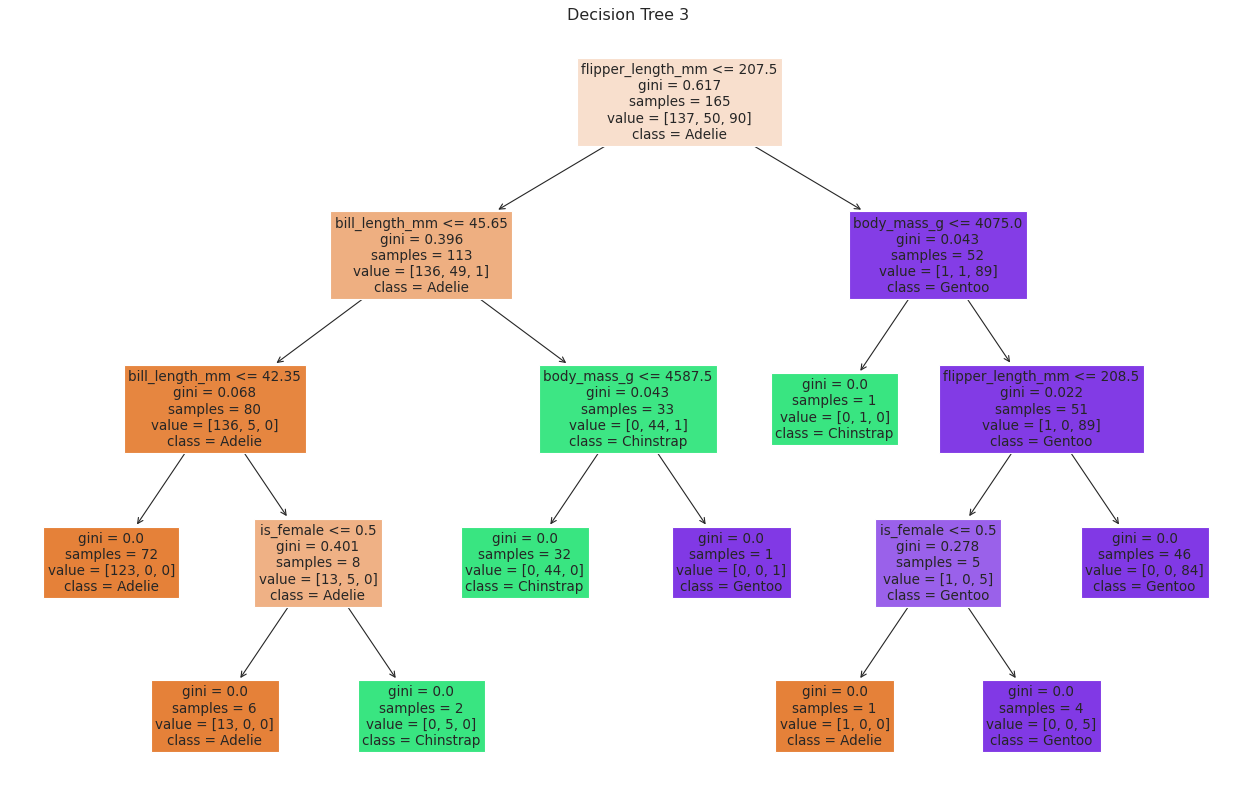

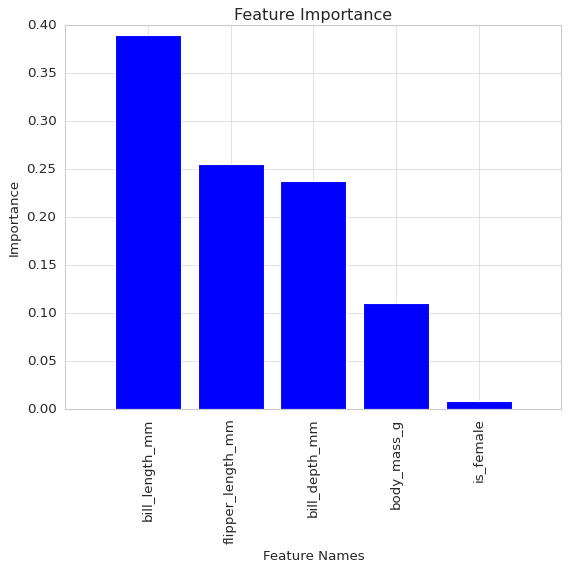

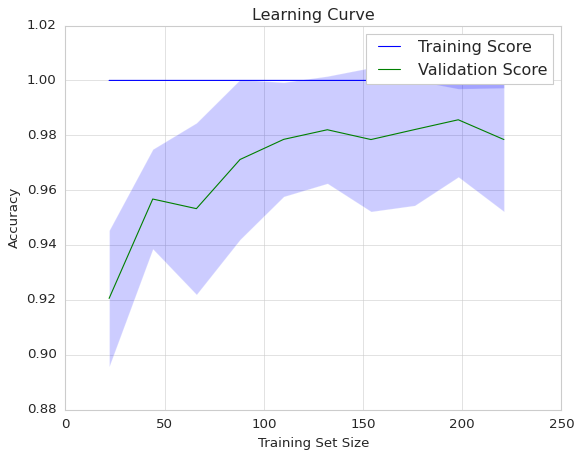

In [96]:
# Load insurance_train_test.pickle file with  X_train, y_train, X_test, y_test variables
with open(r"penguins_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

# Define the Random Forest classifier
rf = RandomForestClassifier()
# Define the hyperparameter grid for tuning
param_grid = {
#   "n_estimators": [10, 50, 100, 200],
    "n_estimators": [5, 10, 20],
    "max_depth": [None, 10,20,30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "random_state": [444]
}

# Perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Train the Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Create a BaggingClassifier with the best Random Forest classifier as the base estimator
bagged_rf = BaggingClassifier(best_rf, n_estimators=10, random_state=42)
bagged_rf.fit(X_train, y_train)

# Evaluate the Bagged Random Forest classifier on the test set
RF1_accuracy = bagged_rf.score(X_test, y_test)
print("Accuracy:", RF1_accuracy)

# Predict the labels for the test set
y_pred = bagged_rf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",             
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Get feature importances
importances = bagged_rf.estimators_[0].feature_importances_

# Get the column names of X_train
feature_names = X_train.columns

# Get the individual decision trees from the Random Forest classifier
decision_trees = bagged_rf.estimators_

# Change bagged_rf with the name of your RandomForestClassifier instance

# Visualize the first 3 decision trees
fig_size = (20, 12)  # Change this to your desired size
for i in range(3):
    plt.figure(figsize=fig_size)
    plot_tree(bagged_rf.estimators_[i].estimators_[0], feature_names=feature_names, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()



# Compute the average feature importances across all base estimators in the Bagged Random Forest classifier
for estimator in bagged_rf.estimators_[1:]:
    importances += estimator.feature_importances_
importances /= len(bagged_rf.estimators_)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


# Create a bar plot of feature importances with feature names as x-tick labels
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# Create a learning curve
train_sizes, train_scores, val_scores = learning_curve(bagged_rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Create a line plot of learning curve
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()



In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Accuracy: 0.9857142857142858
Precision: 0.986734693877551
Recall: 0.9857142857142858
F1 Score: 0.9858689458689458


In [98]:
#Finding the only penguin, which has wrong prediction
Get_penguin = (y_pred != y_test["species_num"])
X_test[Get_penguin]

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  is_female
130            44.1           18.0              210.0       4000.0        0.0

In [99]:
with open("bagged_rf_model.pickle", "wb") as output_file:
    pickle.dump(bagged_rf, output_file)

###Bagged random forest with island

Accuracy: 1.0


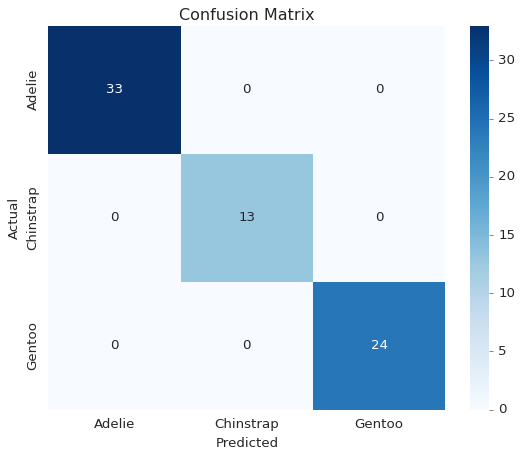

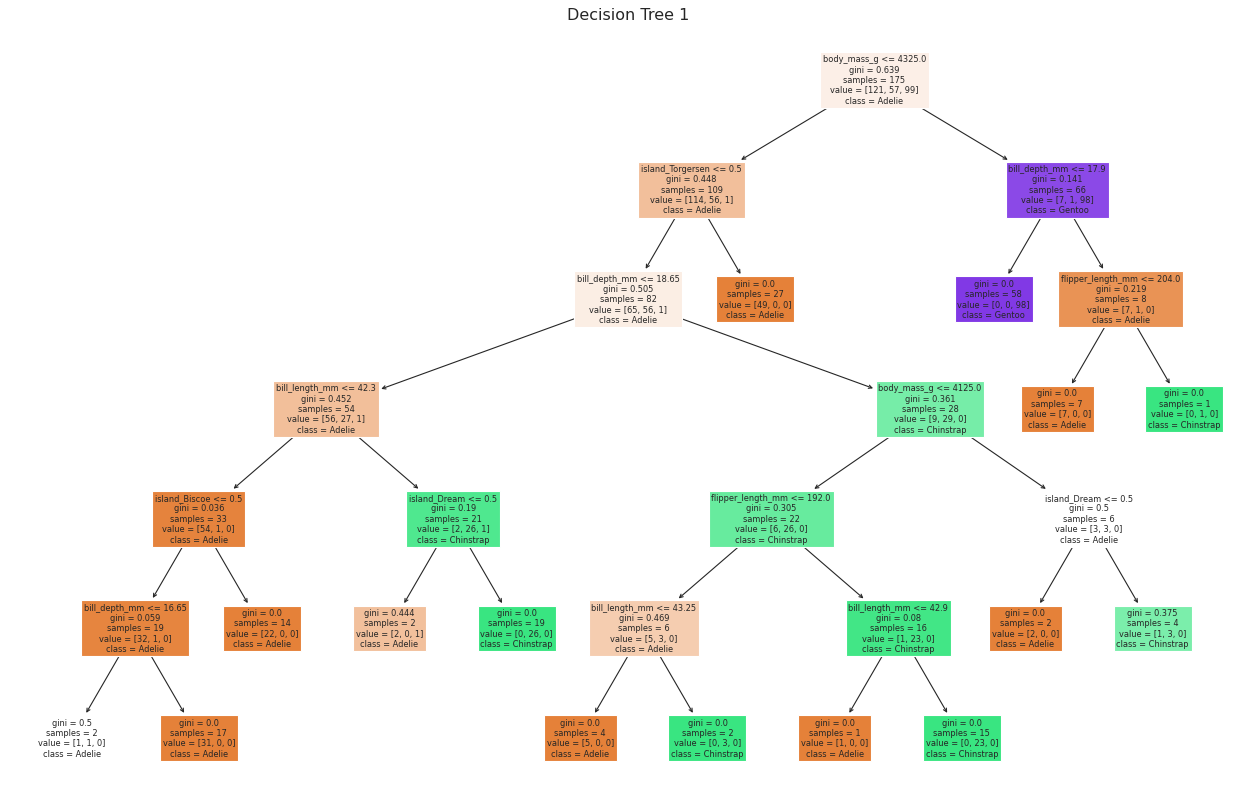

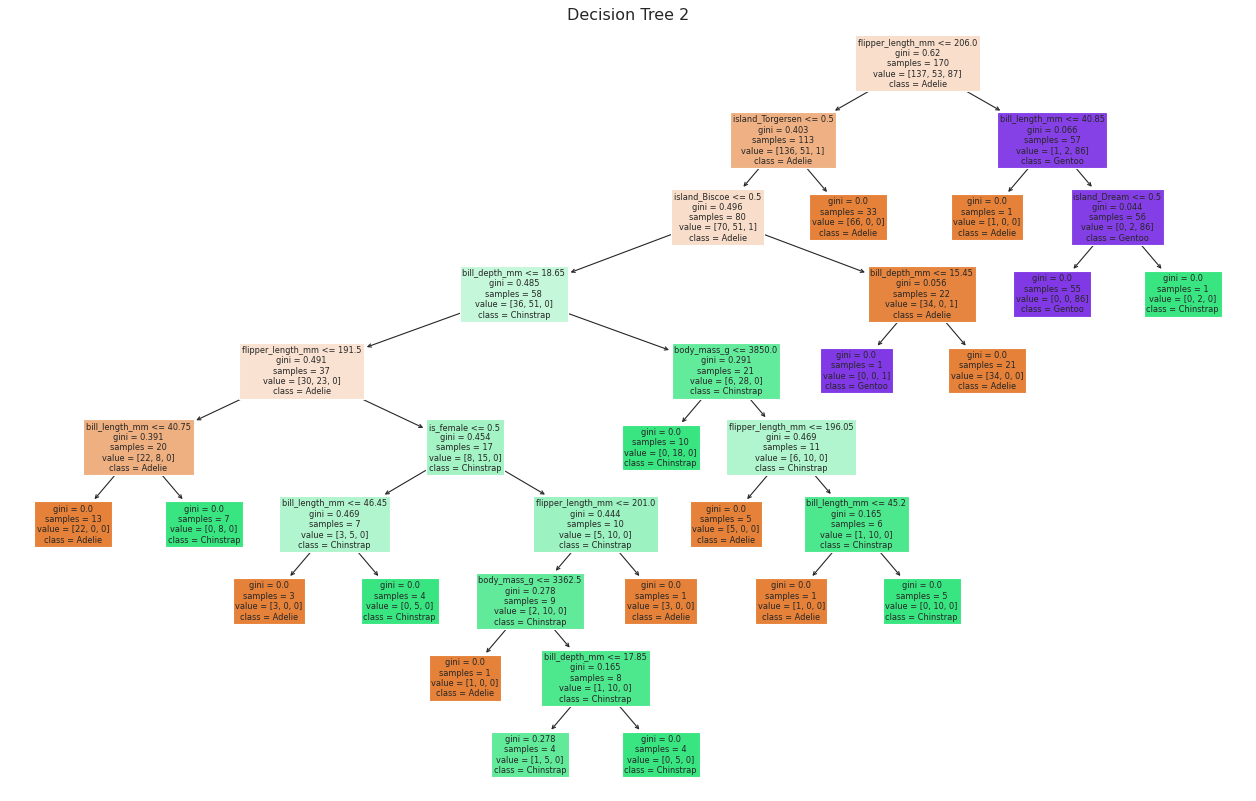

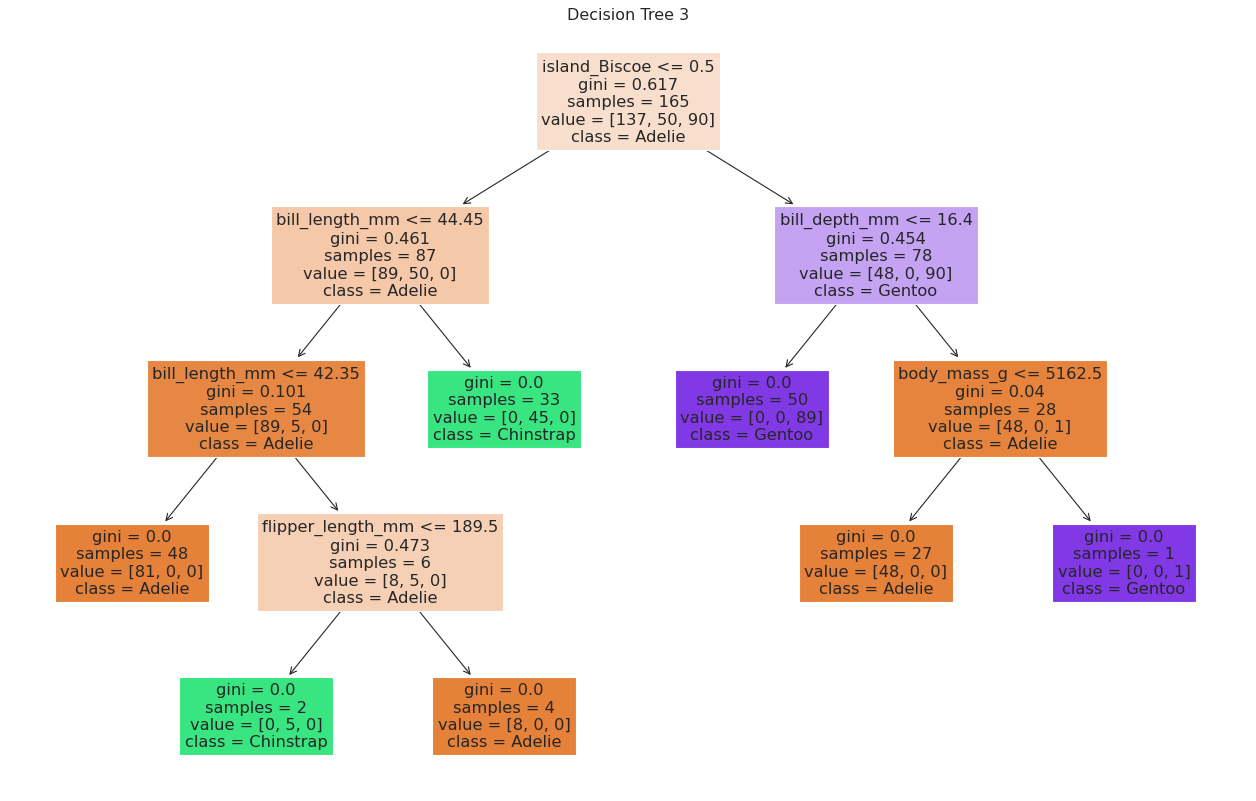

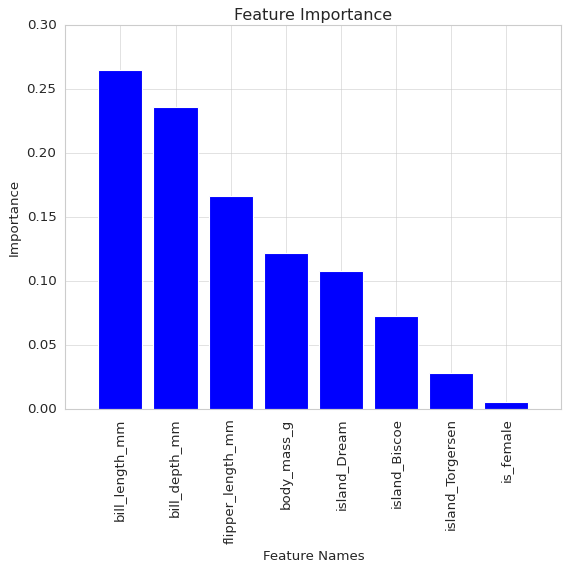

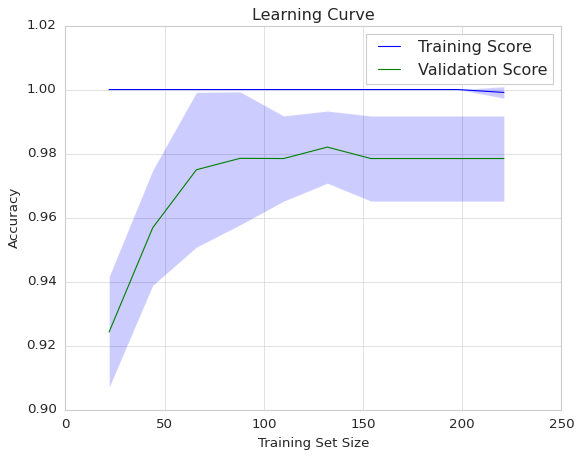

In [100]:
# Load insurance_train_test.pickle file with  X_train, y_train, X_test, y_test variables
with open(r"penguins_with_island_train_test.pickle", "rb") as input_file:
    X_train, y_train, X_test, y_test = pickle.load(input_file)

# Define the Random Forest classifier
rf = RandomForestClassifier()
# Define the hyperparameter grid for tuning
param_grid = {
#   "n_estimators": [10, 50, 100, 200],
    "n_estimators": [5, 10, 20],
    "max_depth": [None, 10,20,30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "random_state": [444]
}

# Perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Train the Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Create a BaggingClassifier with the best Random Forest classifier as the base estimator
bagged_rf = BaggingClassifier(best_rf, n_estimators=10, random_state=42)
bagged_rf.fit(X_train, y_train)

# Evaluate the Bagged Random Forest classifier on the test set
RF1_accuracy = bagged_rf.score(X_test, y_test)
print("Accuracy:", RF1_accuracy)

# Predict the labels for the test set
y_pred = bagged_rf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",             
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Get feature importances
importances = bagged_rf.estimators_[0].feature_importances_

# Get the column names of X_train
feature_names = X_train.columns

# Get the individual decision trees from the Random Forest classifier
decision_trees = bagged_rf.estimators_

# Change bagged_rf with the name of your RandomForestClassifier instance

# Visualize the first 3 decision trees
fig_size = (20, 12)  # Change this to your desired size
for i in range(3):
    plt.figure(figsize=fig_size)
    plot_tree(bagged_rf.estimators_[i].estimators_[0], feature_names=feature_names, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()



# Compute the average feature importances across all base estimators in the Bagged Random Forest classifier
for estimator in bagged_rf.estimators_[1:]:
    importances += estimator.feature_importances_
importances /= len(bagged_rf.estimators_)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


# Create a bar plot of feature importances with feature names as x-tick labels
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# Create a learning curve
train_sizes, train_scores, val_scores = learning_curve(bagged_rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Create a line plot of learning curve
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [101]:
with open("bagged_rf_model_island.pickle", "wb") as output_file:
    pickle.dump(bagged_rf, output_file)

In [102]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#6. Evaluation
Report the performance of your model using different metrics (Precision, recall, F1 score. Choose the appropriate one)
	


##XGB evaluation

In [103]:
print("Train RMSE:", XGB_rmse_train)
print("Test RMSE:", XGB_rmse_test)
print("Train MSE:", XGB_mse_train)
print("Test MSE:", XGB_mse_test)
print("Train MAE:", XGB_mae_train)
print("Test MAE:", XGB_mae_test)
print("Train R-squared score:", XGB_r2_train)
print("Test R-squared score:", XGB_r2_test)

Train RMSE: 0.06728872811760524
Test RMSE: 0.24170194029239114
Train MSE: 0.004527772931684997
Test MSE: 0.05841982794110661
Train MAE: 0.04330991523925363
Test MAE: 0.07932441532611847
Train R-squared score: 0.9942311532450723
Test R-squared score: 0.9267697219464256


##Bagged random forest evaluation

In [104]:
print("RF1_accuracy", RF1_accuracy)

RF1_accuracy 1.0


# Single Classification Tree metrics

In [105]:
# Accuracy
print("Accuracy with Island:", accuracy_STC_I)
print("Accuracy without Island:", accuracy_STC_WI)
print("========================================")
# Calculate precision
print("Precision with Island:", precision_STC_I)
print("Precision without Island:", precision_STC_WI)
print("========================================")
# Calculate recall
print("Recall with Island:", recall_STC_I)
print("Recall without Island:", recall_STC_WI)
print("========================================")
# Calculate F1 score
print("F1 score with Island:", f1_STC_I)
print("F1 score without Island:", f1_STC_WI)

Accuracy with Island: 0.9714285714285714
Accuracy without Island: 0.9714285714285714
Precision with Island: 0.9719999999999999
Precision without Island: 0.9719999999999999
Recall with Island: 0.9714285714285714
Recall without Island: 0.9714285714285714
F1 score with Island: 0.9712886297376093
F1 score without Island: 0.9712886297376093


##Logistic Regression metrics

In [106]:
#Accuracy
print("Accuracy with Island:",accuracy_LogReg_I)
print("Accuracy without Island:",accuracy_LogReg_WI)

print("========================================")

#Precision
print("Precision with Island:",precision_weighted_LogReg_I)
print("Precision without Island:",precision_LogReg_WI)

print("========================================")

#Recall
print("Recall with Island:",recall_weighted_LogReg_I)
print("Recall without Island:",recall_LogReg_WI)

print("========================================")

#F1 Score
print("F1 Score with Island:",f1_LogReg_I)
print("F1 Score without Island:",f1_LogReg_WI)


Accuracy with Island: 0.9571428571428572
Accuracy without Island: 0.9714285714285714
Precision with Island: 0.9567927170868347
Precision without Island: 0.9714285714285714
Recall with Island: 0.9571428571428572
Recall without Island: 0.9714285714285714
F1 Score with Island: 0.9566055437100214
F1 Score without Island: 0.9714285714285714


In [107]:
from scipy.optimize import linprog
import numpy as np

# Coefficients of the objective function (c)
c = [0.02, 0.03, 0.012, 0.016]

# Coefficients of the inequality constraints matrix (A_ub)
A_ub = [
    [-0.2, -0.22, -0.15, -0.25],  # Protein constraint
    [-0.35, -0.2, -0.15, -0.3],  # Carbohydrate constraint
    [0.35, 0.1, 0.4, 0.2],  # Fat constraint
    [1, 1, 1, 1]  # Weight constraint
]

# Right-hand side of the inequality constraints (b_ub)
b_ub = [-120, -130, 90, 500]  # Weight constraint set to 500g

# Bounds on the variables (x)
bounds = [(0, None), (0, None), (0, None), (0, None)]  # x1, x2, x3, x4

# Solve the linear programming problem
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')

if res.success:
    print("Optimal solution found!")
    optimal_amounts = np.round(res.x).astype(int)
    print("Optimal amounts of masových směsí (ryba, kuře, prase, ovce):", optimal_amounts)
    print("Minimal cost:", round(res.fun, 2))
else:
    print("Optimal solution not found.")


Optimal solution found!
Optimal amounts of masových směsí (ryba, kuře, prase, ovce): [  0  79   0 411]
Minimal cost: 8.94


<ipython-input-107-a1075ae45369>:22: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')


In [108]:
from scipy.optimize import linprog

# Coefficients of the objective function (c)
c = [0.02, 0.03, 0.012, 0.016]

# Coefficients of the inequality constraints matrix (A_ub)
A_ub = [
    [-0.2, -0.22, -0.15, -0.25],  # Protein constraint
    [-0.35, -0.2, -0.15, -0.3],  # Carbohydrate constraint
    [0.35, 0.1, 0.4, 0.2],  # Fat constraint
    [1, 1, 1, 1]  # Weight constraint
]

# Right-hand side of the inequality constraints (b_ub)
b_ub = [-120, -130, 90, 500]  # Weight constraint set to 500g

# Bounds on the variables (x)
bounds = [(0, None), (0, None), (0, None), (0, None)]  # x1, x2, x3, x4

# Solve the linear programming problem
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')

if res.success:
    print("Optimal solution found!")
    print("Optimal amounts of masových směsí (ryba, kuře, prase, ovce):", res.x)
    print("Minimal cost:", res.fun)
else:
    print("Optimal solution not found.")


Optimal solution found!
Optimal amounts of masových směsí (ryba, kuře, prase, ovce): [  0.          78.94736842   0.         410.52631579]
Minimal cost: 8.936842105263157


<ipython-input-108-826644cecfc7>:21: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')


 	
#7. Development Environment Characteristics
Packages utilized and its respective version and python version 	

In [109]:
pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.1
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.1

#References


1. Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081
2. Vidiyala R. (2020) Performance Metrics for classification Machine Learning. https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007
3. Lewinson E. (2021) Phik (𝜙k) — get familiar with the latest correlation coefficient https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7